### Import Library

In [ ]:
# Base Library
import pandas as pd
import numpy as np

# Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-processing Library
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve

# ML Algorithm Library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import optuna

# Evaluation Library
from sklearn.metrics import mean_absolute_percentage_error, r2_score, root_mean_squared_error, make_scorer

# Export model for deployment
import pickle

### Business Understanding
---

1. How can the most appropriate machine learning algorithm be selected for predicting house prices in Kabupaten Tangerang?
2. How can a house price prediction model for Kabupaten Tangerang be implemented as a web application using Streamlit?
3. How can the accuracy of the house price prediction model for Kabupaten Tangerang be measured?

### Data Understanding

In [ ]:
# Read the data
df = pd.read_csv("../data/processed/hasil_scraping_rumah123.csv", engine='pyarrow', sep=';')
df = df.drop(columns=['URL', 'IMB', 'Lainnya', 'Garasi'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Harga                 4991 non-null   object
 1   Lokasi                4991 non-null   object
 2   Kamar Tidur           4991 non-null   int64 
 3   Kamar Mandi           4991 non-null   int64 
 4   Luas Tanah            4991 non-null   object
 5   Luas Bangunan         4991 non-null   object
 6   Sertifikat            4991 non-null   object
 7   Daya Listrik          4991 non-null   object
 8   Jumlah Lantai         4991 non-null   int64 
 9   Kondisi Properti      4991 non-null   object
 10  Carport               4991 non-null   int64 
 11  Kamar Tidur Pembantu  4991 non-null   int64 
 12  Kamar Mandi Pembantu  4991 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 507.0+ KB


In [ ]:
# Take a peek of the first 5 data
df.head()

,Harga,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Jumlah Lantai,Kondisi Properti,Carport,Kamar Tidur Pembantu,Kamar Mandi Pembantu
0,Rp 1 Miliar,"BSD, Tangerang",4,2,114 m²,147 m²,SHM,1300 Watt,2,Bagus,1,0,0
1,Rp 1 Miliar,"Tangerang, Tangerang",2,1,126 m²,60 m²,SHM,2200 Watt,1,Bagus,1,0,0
2,Rp 1 Miliar,"BSD City, Tangerang",3,2,84 m²,81 m²,HGB,1300 Watt,2,Bagus,1,0,0
3,Rp 1 Miliar,"BSD, Tangerang",3,2,103 m²,66 m²,SHM,1300 Watt,1,Bagus,1,0,0
4,Rp 1 Miliar,"BSD, Tangerang",3,2,103 m²,66 m²,SHM,1300 Watt,1,Bagus,1,0,0


#### Exploratory Data Analysis

In [ ]:
# Take a look of the brief statistics of the dataset
df.describe()

,Kamar Tidur,Kamar Mandi,Jumlah Lantai,Carport,Kamar Tidur Pembantu,Kamar Mandi Pembantu
count,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000
mean,3.407734,2.783811,1.902424,1.393308,0.598077,0.520537
std,1.400634,1.501217,0.565806,0.702549,0.620579,0.576362
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000
75%,4.000000,3.000000,2.000000,2.000000,1.000000,1.000000
max,34.000000,34.000000,4.000000,10.000000,5.000000,15.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_11108\238219180.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11108\238219180.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11108\238219180.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11108\238219180.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=

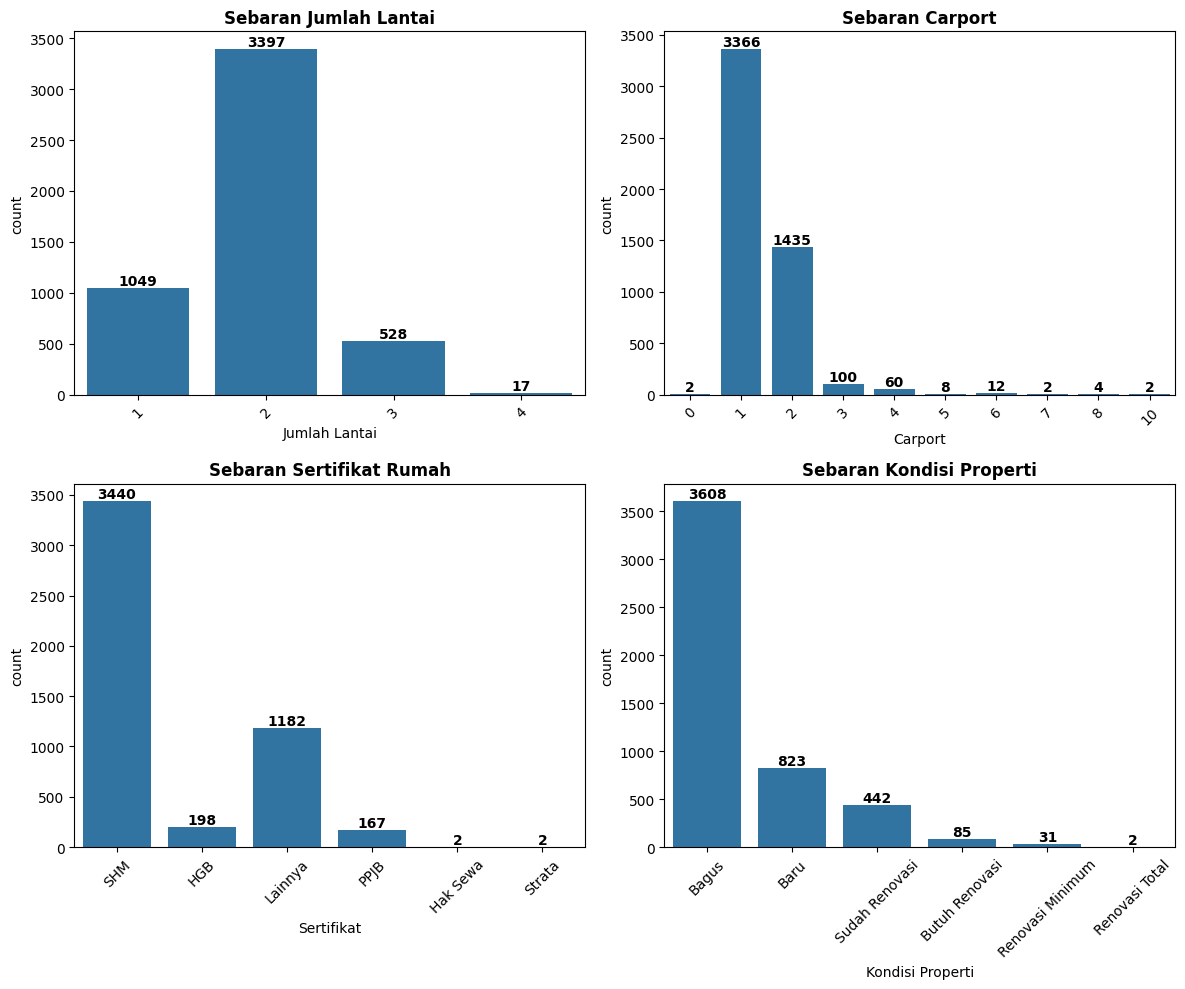

In [ ]:
# Visualize some columns
# Creating a figure with 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# List of rows and columns
columns = ['Jumlah Lantai', 'Carport', 'Sertifikat', 'Kondisi Properti']
titles = ['Sebaran Jumlah Lantai', 'Sebaran Carport', 'Sebaran Sertifikat Rumah', 'Sebaran Kondisi Properti']

# Loop to create countplot and add the data label
for i, ax in enumerate(axes.flat):
    sns.countplot(x=df[columns[i]], ax=ax)
    ax.set_title(titles[i], weight='bold')

    # Add data label above the data bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
        
    # Rotate x label for 45 degree
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjusting the layouts
plt.tight_layout()
plt.show()

### Data Preparation

Before creating the ML model, here I will do the following process of Data Pre-processing:
1. Convert Data Types: <br>Cleaned and converted object/string columns into numeric types to make them suitable for mathematical operations.
2. Feature Extraction: <br>Extracted the district (Kecamatan) from the full Lokasi string to create a more structured and impactful categorical feature.
3. Filtering Data: <br>Filtered the dataset to eliminate anomaly.
4. Outliers Handling: <br>Capped extreme values in key numeric columns using the IQR method to prevent them from skewing the model's training process.
5. Encoding: <br>Transformed categorical features into a numerical format using One-Hot Encoding, allowing the machine learning models to process them.
6. Feature Selection: <br>Separated the data into predictor variables (X) and the target variable (y, Harga) in preparation for model training.
7. Data Splitting: <br>Divided the dataset into training (80%) and testing (20%) sets to ensure the model is evaluated on unseen data for an unbiased performance assessment.


#### Convert Data Types

In [ ]:
# Function to convert house prices
def convert_price(price):
    # Remove 'Rp' and extra spaces
    price = price.replace('Rp', '').strip()
    
    # Separate numbers and units
    if 'Juta' in price:
        value = price.replace(' Juta', '').replace(',', '.')  # Replace ',' to '.'
        multiplier = 1e6  # 1 Juta = 1.000.000
    elif 'Miliar' in price:
        value = price.replace(' Miliar', '').replace(',', '.')  # Replace ',' to '.'
        multiplier = 1e9  # 1 Miliar = 1.000.000.000
    else:
        return None  # If the format is incorrect
    
    # Convert to float, then return it in integer
    value = float(value)  
    return int(value * multiplier)

# Convert 'Harga' Column
df['Harga'] = df['Harga'].apply(convert_price)

# Look at the first five data after converting the 'Harga' column
df.head()

,Harga,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Jumlah Lantai,Kondisi Properti,Carport,Kamar Tidur Pembantu,Kamar Mandi Pembantu
0,1000000000,"BSD, Tangerang",4,2,114 m²,147 m²,SHM,1300 Watt,2,Bagus,1,0,0
1,1000000000,"Tangerang, Tangerang",2,1,126 m²,60 m²,SHM,2200 Watt,1,Bagus,1,0,0
2,1000000000,"BSD City, Tangerang",3,2,84 m²,81 m²,HGB,1300 Watt,2,Bagus,1,0,0
3,1000000000,"BSD, Tangerang",3,2,103 m²,66 m²,SHM,1300 Watt,1,Bagus,1,0,0
4,1000000000,"BSD, Tangerang",3,2,103 m²,66 m²,SHM,1300 Watt,1,Bagus,1,0,0


In [ ]:
# # Location check
# # Check if 'Lokasi' column is in the dataset
# if "Lokasi" in df.columns:
#     # Count the values of each location
#     lokasi_counts = df["Lokasi"].value_counts()
    
#     # Save the file in .txt format
#     file_path = "../data/processed/lokasi_counts.txt"
#     lokasi_counts.to_csv(file_path, sep="\t", header=True)

#     print(f"Results saved on: {file_path}")
# else:
#     print("'Lokasi' column can't be found on the dataset.")

In [ ]:
# Tidying the data
# Remove rows with 'Lainnya' or 'Lainnya Watt' on 'Daya Listrik' Column
df = df[~df['Daya Listrik'].isin(['Lainnya', 'Lainnya Watt'])]

# Ensure all columns are of type string before using .str.replace(), then convert to int.
df['Daya Listrik'] = df['Daya Listrik'].astype(str).str.replace(' Watt', '', regex=False).astype('Int64')
df['Luas Tanah'] = df['Luas Tanah'].astype(str).str.replace(' m²', '', regex=False).astype('Int64')
df['Luas Bangunan'] = df['Luas Bangunan'].astype(str).str.replace(' m²', '', regex=False).astype('Int64')

# Convert number columns directly to integers
df['Kamar Tidur'] = df['Kamar Tidur'].astype('Int64')
df['Kamar Mandi'] = df['Kamar Mandi'].astype('Int64')
df['Jumlah Lantai'] = df['Jumlah Lantai'].astype('Int64')
df['Carport'] = df['Carport'].astype('Int64')
df['Kamar Tidur Pembantu'] = df['Kamar Tidur Pembantu'].astype('Int64')
df['Kamar Mandi Pembantu'] = df['Kamar Mandi Pembantu'].astype('Int64')
df['Kondisi Properti'] = df['Kondisi Properti'].str.replace('Sudah Renovasi', 'Bagus')
df['Kondisi Properti'] = df['Kondisi Properti'].str.replace('Renovasi Total', 'Butuh Renovasi')
df['Kondisi Properti'] = df['Kondisi Properti'].str.replace('Renovasi Minimum', 'Butuh Renovasi')

#### Feature Extraction

To extract subdistrict name from 'Lokasi' column

In [ ]:
# Location mapping
# List of subdistricts in Tangerang Regency
desa_kabupaten = {
    "BSD Eminent": "Pagedangan",
    "BSD Green Wich": "Pagedangan",
    "BSD Avani": "Pagedangan",
    "BSD Vanya Park": "Pagedangan",
    "BSD Foresta": "Pagedangan",
    "BSD The Green": "Pagedangan",
    "BSD Kencana Loka": "Pagedangan",
    "BSD Taman Giri Loka": "Pagedangan",
    "BSD Telaga Golf": "Pagedangan",
    "BSD Neo Catalonia": "Pagedangan",
    "BSD Provance Parkland": "Pagedangan",
    "BSD Alegria": "Pagedangan",
    "Cikupa": "Cikupa",
    "Cikupa Citra Raya": "Cikupa",
    "Cisauk" : "Cisauk",
    "Suvarna Sutera": "Cikupa",
    "Panongan": "Panongan",
    "Curug": "Curug",
    "Legok": "Legok",
    "Pasar Kemis": "Pasar Kemis",
    "Sepatan": "Sepatan",
    "Bitung": "Curug",
    "Tigaraksa": "Tigaraksa",
    "Balaraja": "Balaraja",
    "Jayanti": "Jayanti",
    "Kosambi": "Kosambi",
    "Teluk Naga": "Teluk Naga",
    "Mauk": "Mauk",
    "Kresek": "Kresek",
    "Solear": "Solear",
    "Sindang Jaya": "Sindang Jaya",
    "Rajeg": "Rajeg",
    "Kadu": "Kadu",
    "Jatake": "Jatiuwung",
    "Bojong Nangka": "Kelapa Dua",
    "Suradita": "Cisauk",
    "Cukang Galih": "Curug",
    "Gading Serpong": "Kelapa Dua",
    "Gading Serpong Pondok Hijau Golf": "Kelapa Dua",
    "Gading Serpong The Spring": "Kelapa Dua",
    "Gading Serpong Scientia Garden": "Kelapa Dua",
    "Gading Serpong Samara Village": "Kelapa Dua",
    "Gading Serpong IL Lago": "Kelapa Dua",
    "Gading Serpong Elista Village": "Kelapa Dua",
    "Gading Serpong Serenade Lake": "Kelapa Dua",
    "Gading Serpong Cluster Bohemia": "Kelapa Dua",
    "Gading Serpong Omaha Village": "Kelapa Dua",
    "Gading Serpong La Bella Village": "Kelapa Dua",
    "Gading Serpong Virginia Village": "Kelapa Dua",
    "Gading Serpong Cluster Oleaster": "Kelapa Dua",
    "Gading Serpong Cluster Michelia": "Kelapa Dua",
    "Gading Serpong Karelia Village": "Kelapa Dua",
    "Gading Serpong Andalucia": "Kelapa Dua",
    "Gading Serpong Cluster IL Rosa": "Kelapa Dua",
    "Pasar Kemis" : "Pasar Kemis", 
}

# Function to extract subdistricts from locations
def extract_kecamatan(lokasi):
    for key in desa_kabupaten.keys():
        if key in lokasi:
            return desa_kabupaten[key]
    return None  # If not found

# Filter only houses in Tangerang Regency
df["Kecamatan"] = df["Lokasi"].apply(extract_kecamatan) # Extract subdistrict name
df_kabupaten = df.dropna(subset=["Kecamatan"])  # Drop house data that is not located in Tangerang Regency
df_kabupaten = df_kabupaten.drop(columns=['Lokasi']) # Drop unused columns

# View dataset information after mapping and filtering data
df_kabupaten.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1810 entries, 6 to 4990
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Harga                 1810 non-null   int64 
 1   Kamar Tidur           1810 non-null   Int64 
 2   Kamar Mandi           1810 non-null   Int64 
 3   Luas Tanah            1810 non-null   Int64 
 4   Luas Bangunan         1810 non-null   Int64 
 5   Sertifikat            1810 non-null   object
 6   Daya Listrik          1810 non-null   Int64 
 7   Jumlah Lantai         1810 non-null   Int64 
 8   Kondisi Properti      1810 non-null   object
 9   Carport               1810 non-null   Int64 
 10  Kamar Tidur Pembantu  1810 non-null   Int64 
 11  Kamar Mandi Pembantu  1810 non-null   Int64 
 12  Kecamatan             1810 non-null   object
dtypes: Int64(9), int64(1), object(3)
memory usage: 213.9+ KB


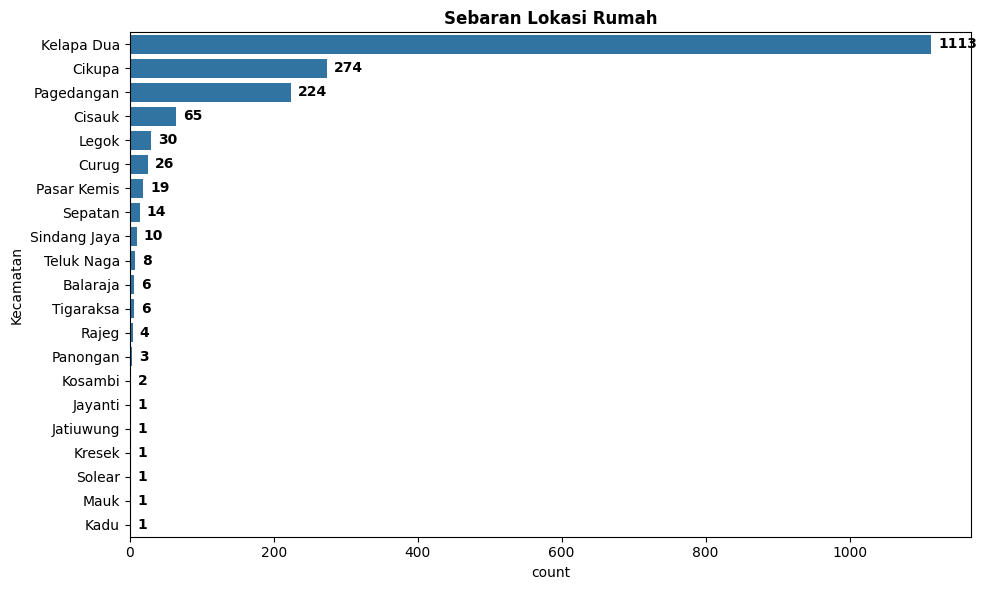

In [ ]:
# View subdistrict distribution
# Create figure
plt.figure(figsize=(10, 6))

# Creating a countplot with order based on data quantity
ax = sns.countplot(y=df_kabupaten['Kecamatan'], order=df_kabupaten['Kecamatan'].value_counts().index)

# Adding a title
plt.title("Sebaran Lokasi Rumah", weight='bold')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',  # Total property value
                (p.get_width(), p.get_y() + p.get_height() / 2),  # Text Position
                ha='left', va='center', fontsize=10, fontweight='bold', xytext=(5, 0), textcoords='offset points')

# Adjust the layout so that elements do not overlap
plt.tight_layout()
plt.show()

#### Filtering Data

Filter the data to remove anomaly.

In [ ]:
# Filter the required data
df_kabupaten = df_kabupaten[(df_kabupaten['Carport'] != 0) & (df_kabupaten['Carport'] <= 4)]
df_kabupaten = df_kabupaten[(df_kabupaten['Jumlah Lantai'] != 0) & (df_kabupaten['Jumlah Lantai'] != 4)]
df_kabupaten = df_kabupaten[(df_kabupaten['Sertifikat'] != "Strata") & (df_kabupaten['Sertifikat'] != 'Hak Sewa')]
df_kabupaten = df_kabupaten[(df_kabupaten['Luas Bangunan'] <= 1000) & (df_kabupaten['Luas Tanah'] <= 1000)]

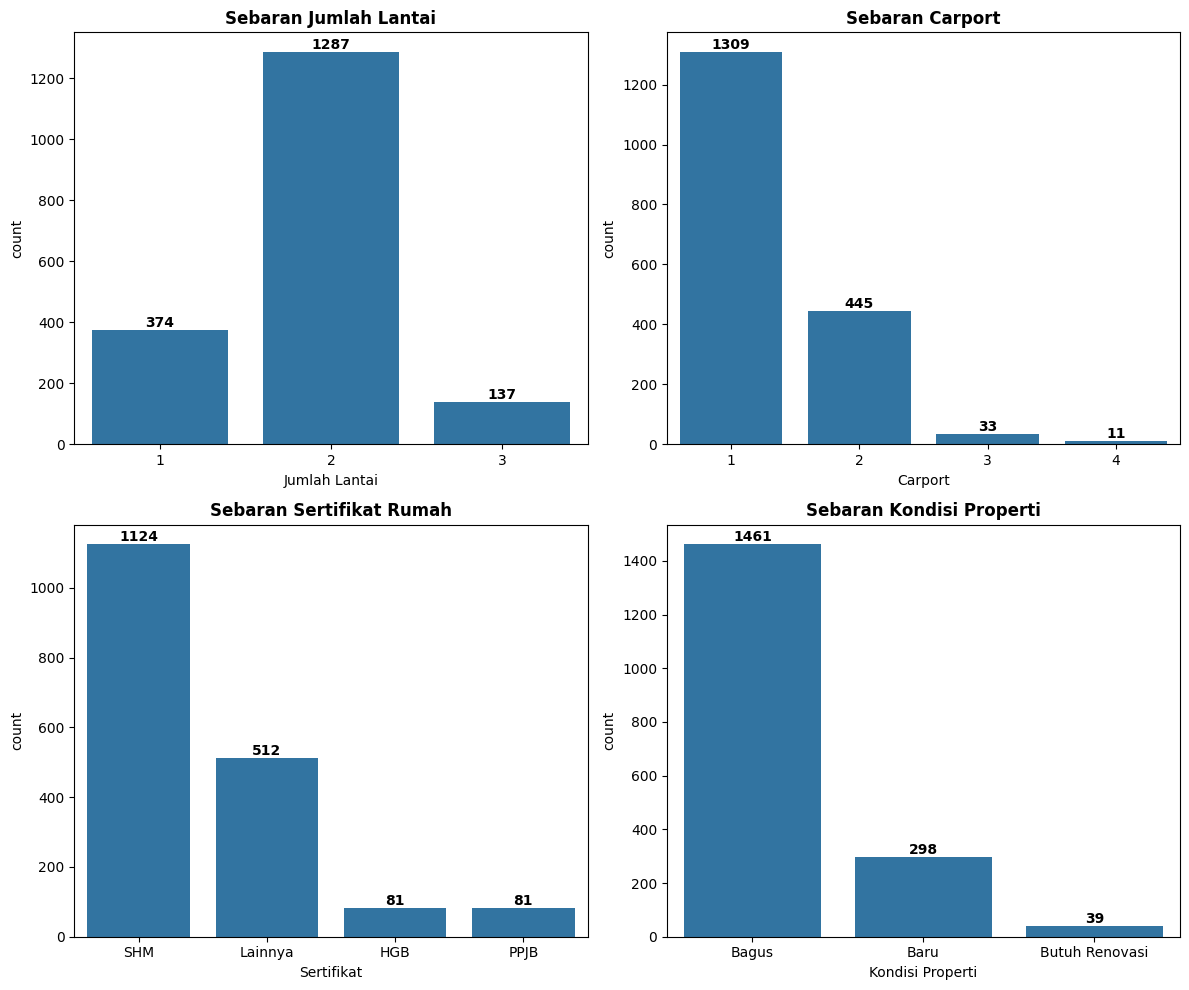

In [ ]:
# Visualization of multiple columns
# Creating a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# List of columns and titles
columns = ['Jumlah Lantai', 'Carport', 'Sertifikat', 'Kondisi Properti']
titles = ['Sebaran Jumlah Lantai', 'Sebaran Carport', 'Sebaran Sertifikat Rumah', 'Sebaran Kondisi Properti']

# Loop to create a countplot and add data labels
for i, ax in enumerate(axes.flat):
    sns.countplot(x=df_kabupaten[columns[i]], ax=ax)
    ax.set_title(titles[i], weight='bold')

    # Adding labels above the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adjust the layout so that elements do not overlap
plt.tight_layout()
plt.show()

In [ ]:
# Export Dataset for filter
# df_kabupaten.info()
# df_kabupaten.to_csv("../Dataset/Data Harga Rumah Kabupaten Tangerang.csv", index=False)

#### Encoding

Encoding for categorical values.

In [ ]:
# 'Sertifikat' column encoding
sertif_enc = OrdinalEncoder(categories=[
    ['PPJB', 'HGB', 'Lainnya', 'SHM']  # Urutan Sertifikat (PPJB rendah, SHM tertinggi)
])

df_kabupaten[['Sertifikat']] = sertif_enc.fit_transform(df_kabupaten[['Sertifikat']])

# 'Kondisi' column encoding
kondisi_enc = OrdinalEncoder(categories=[
    ['Butuh Renovasi', 'Bagus', 'Baru']  # Urutan Kondisi Properti
])

df_kabupaten[['Kondisi Properti']] = kondisi_enc.fit_transform(df_kabupaten[['Kondisi Properti']])

# 'Daya Listrik' column encoding
watt_enc = OrdinalEncoder(categories=[
    [450, 900, 1300, 2200, 3300, 3500, 4400, 5500, 6600, 7600, 7700, 8000, 10000, 10600, 11000, 13200, 16500, 22000, 23000, 30500, 33000] # Urutan daya listrik
])

df_kabupaten[['Daya Listrik']] = watt_enc.fit_transform(df_kabupaten[['Daya Listrik']])

# 'Kecamatan' column encoding
df_kabupaten = pd.get_dummies(df_kabupaten, columns=['Kecamatan'], prefix='kec')

# View the result
df_kabupaten.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1798 entries, 6 to 4990
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Harga                 1798 non-null   int64  
 1   Kamar Tidur           1798 non-null   Int64  
 2   Kamar Mandi           1798 non-null   Int64  
 3   Luas Tanah            1798 non-null   Int64  
 4   Luas Bangunan         1798 non-null   Int64  
 5   Sertifikat            1798 non-null   float64
 6   Daya Listrik          1798 non-null   float64
 7   Jumlah Lantai         1798 non-null   Int64  
 8   Kondisi Properti      1798 non-null   float64
 9   Carport               1798 non-null   Int64  
 10  Kamar Tidur Pembantu  1798 non-null   Int64  
 11  Kamar Mandi Pembantu  1798 non-null   Int64  
 12  kec_Balaraja          1798 non-null   bool   
 13  kec_Cikupa            1798 non-null   bool   
 14  kec_Cisauk            1798 non-null   bool   
 15  kec_Curug             1798

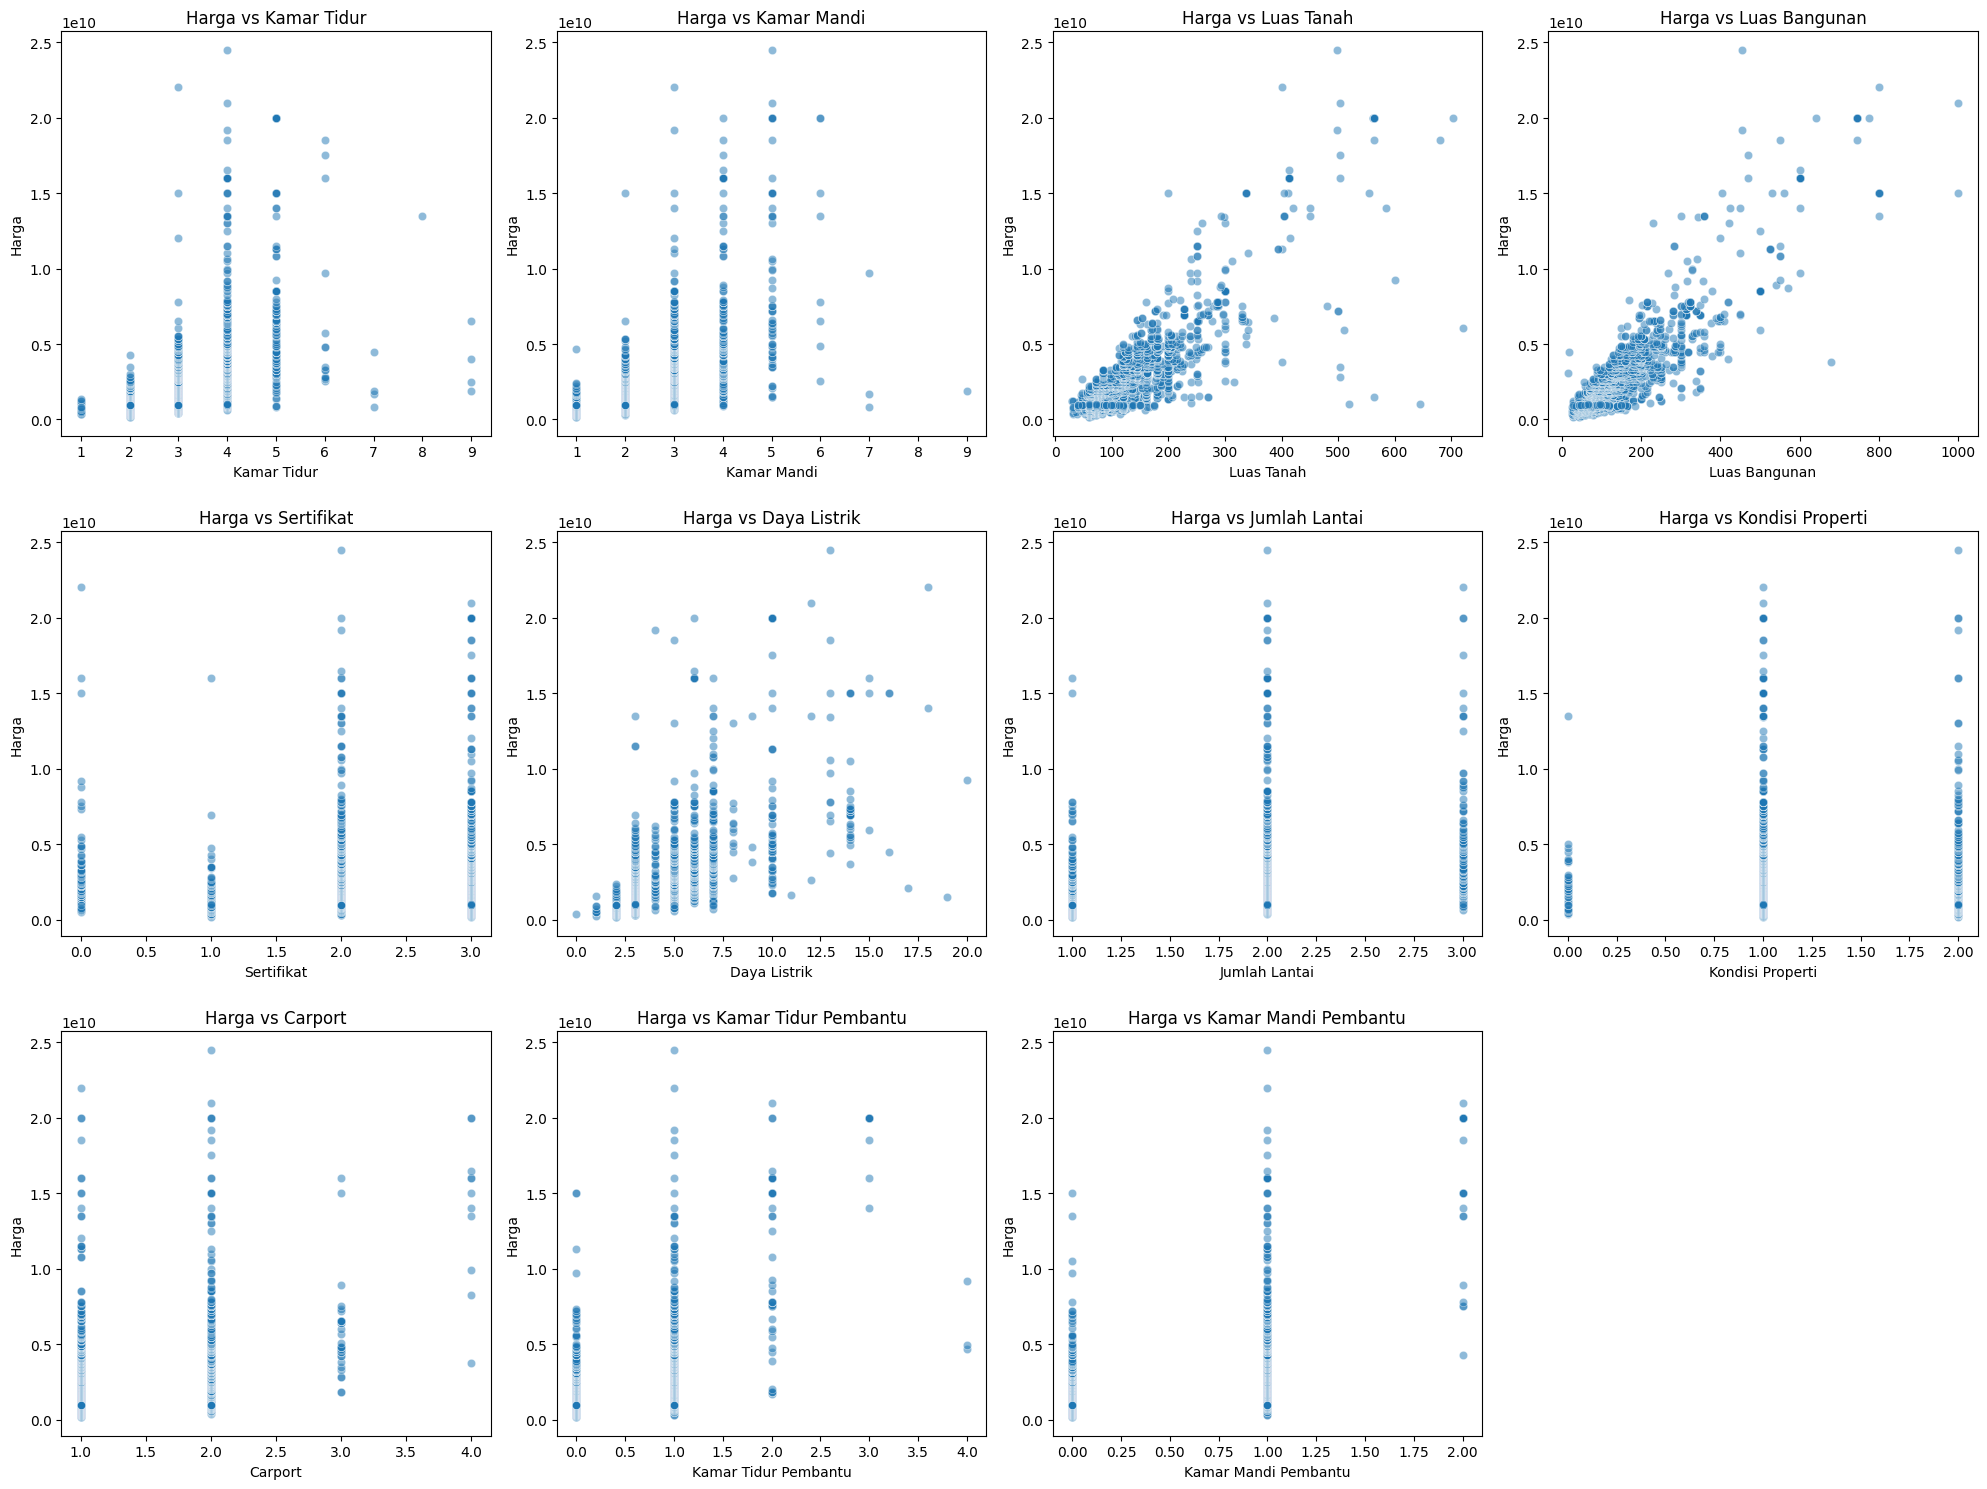

In [ ]:
# Select all numeric columns except the target (Price) and columns you want to exclude.
excluded_columns = ['Harga']
numerical_vars = [col for col in df_kabupaten.select_dtypes(include=['int64', 'float64']).columns if col not in excluded_columns]

# Determine the number of subplots based on the number of variables
num_vars = len(numerical_vars)
num_cols = 4  # Set the number of columns
num_rows = -(-num_vars // num_cols)  # Calculate the number of rows dynamically (ceil division)

# Create subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15), squeeze=False)

# Flatten axes to make it easier to iterate
axes = axes.flatten()

# Create a scatter plot for each numeric variable
for i, num_var in enumerate(numerical_vars):
    sns.scatterplot(x=df_kabupaten[num_var], y=df_kabupaten['Harga'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Harga vs {num_var}')
    axes[i].set_xlabel(num_var)
    axes[i].set_ylabel('Harga')

# Remove empty subplots if the number of variables is less than the grid
for j in range(len(numerical_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

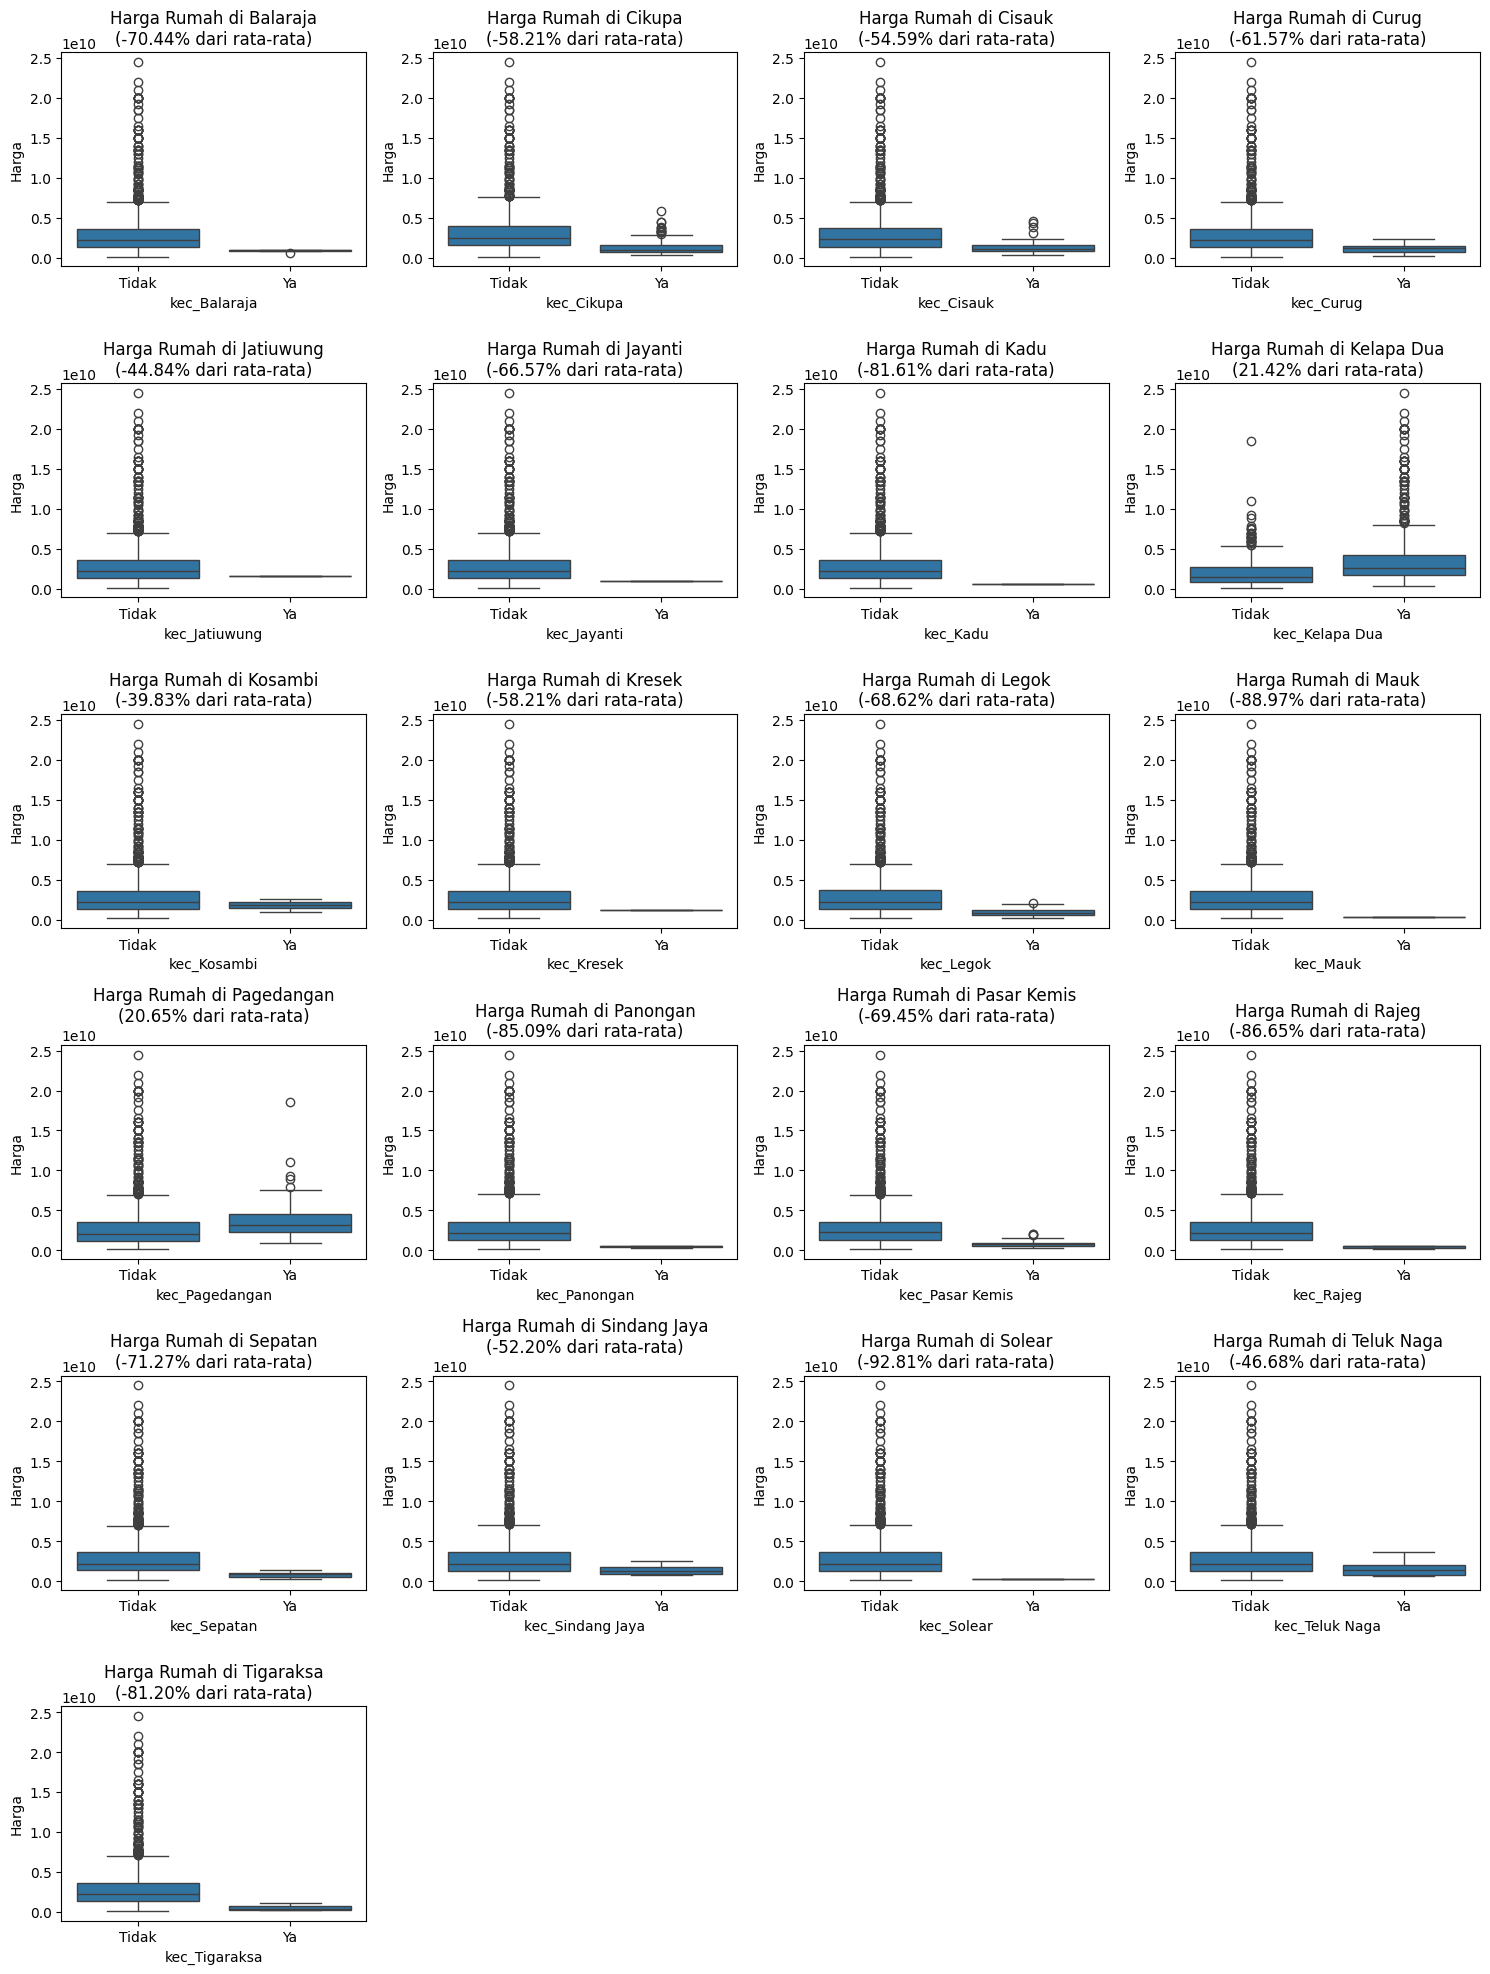

In [ ]:
# View predicted column (y) vs predictor (x)
# Select all columns containing ‘kec_’ (one-hot encoding results)
categorical_vars = [col for col in df_kabupaten.columns if col.startswith('kec_')]

# Calculate the overall average price
avg_price_overall = df_kabupaten['Harga'].mean()

# Determine the number of subplots based on the number of subdistricts
num_vars = len(categorical_vars)
num_cols = 4  # Set the number of columns
num_rows = -(-num_vars // num_cols)  # Calculate the number of rows dynamically (ceil division)

# Create subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20), squeeze=False)
axes = axes.flatten()

# Create a boxplot for each subdistrict
for i, cat_var in enumerate(categorical_vars):
    sns.boxplot(x=df_kabupaten[cat_var], y=df_kabupaten['Harga'], ax=axes[i])

    # Calculate the average price for the subdistrict (only if ‘Yes’ or 1)
    avg_price_kecamatan = df_kabupaten[df_kabupaten[cat_var] == 1]['Harga'].mean()

    # Calculate the percentage ratio
    pct_diff = ((avg_price_kecamatan - avg_price_overall) / avg_price_overall) * 100

    # Update the title with the percentage
    title = f"Harga Rumah di {cat_var.replace('kec_', '')}\n({pct_diff:.2f}% dari rata-rata)"
    axes[i].set_title(title)

    # Set the X-axis label
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Tidak', 'Ya'])

# Delete empty subplots if the number of subdistricts is less than the number of grids
for j in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
print(f"Average price: Rp {avg_price_overall:,.0f}")
print(f"Average house price in Kelapa Dua District (+21.42%): Rp {avg_price_overall * 1.2142:,.0f}")
print(f"Average house price in Pagedangan District (+20.65%): Rp {avg_price_overall * 1.2065:,.0f}")
print(f"Average house price in Solear District (-92.81%): Rp {avg_price_overall * (1 - 0.9281):,.0f}")
print(f"Average house price in Mauk District (-88.97%): Rp {avg_price_overall * (1 - 0.8897):,.0f}")

Harga rata-rata: Rp 2,991,479,422
Rata-rata harga rumah di Kecamatan Kelapa Dua (+21,42%): Rp 3,632,254,314
Rata-rata harga rumah di Kecamatan Pagedangan (+20,65%): Rp 3,609,219,922
Rata-rata harga rumah di Kecamatan Solear (-92.81%): Rp 215,087,370
Rata-rata harga rumah di Kecamatan Mauk (-88.97%): Rp 329,960,180


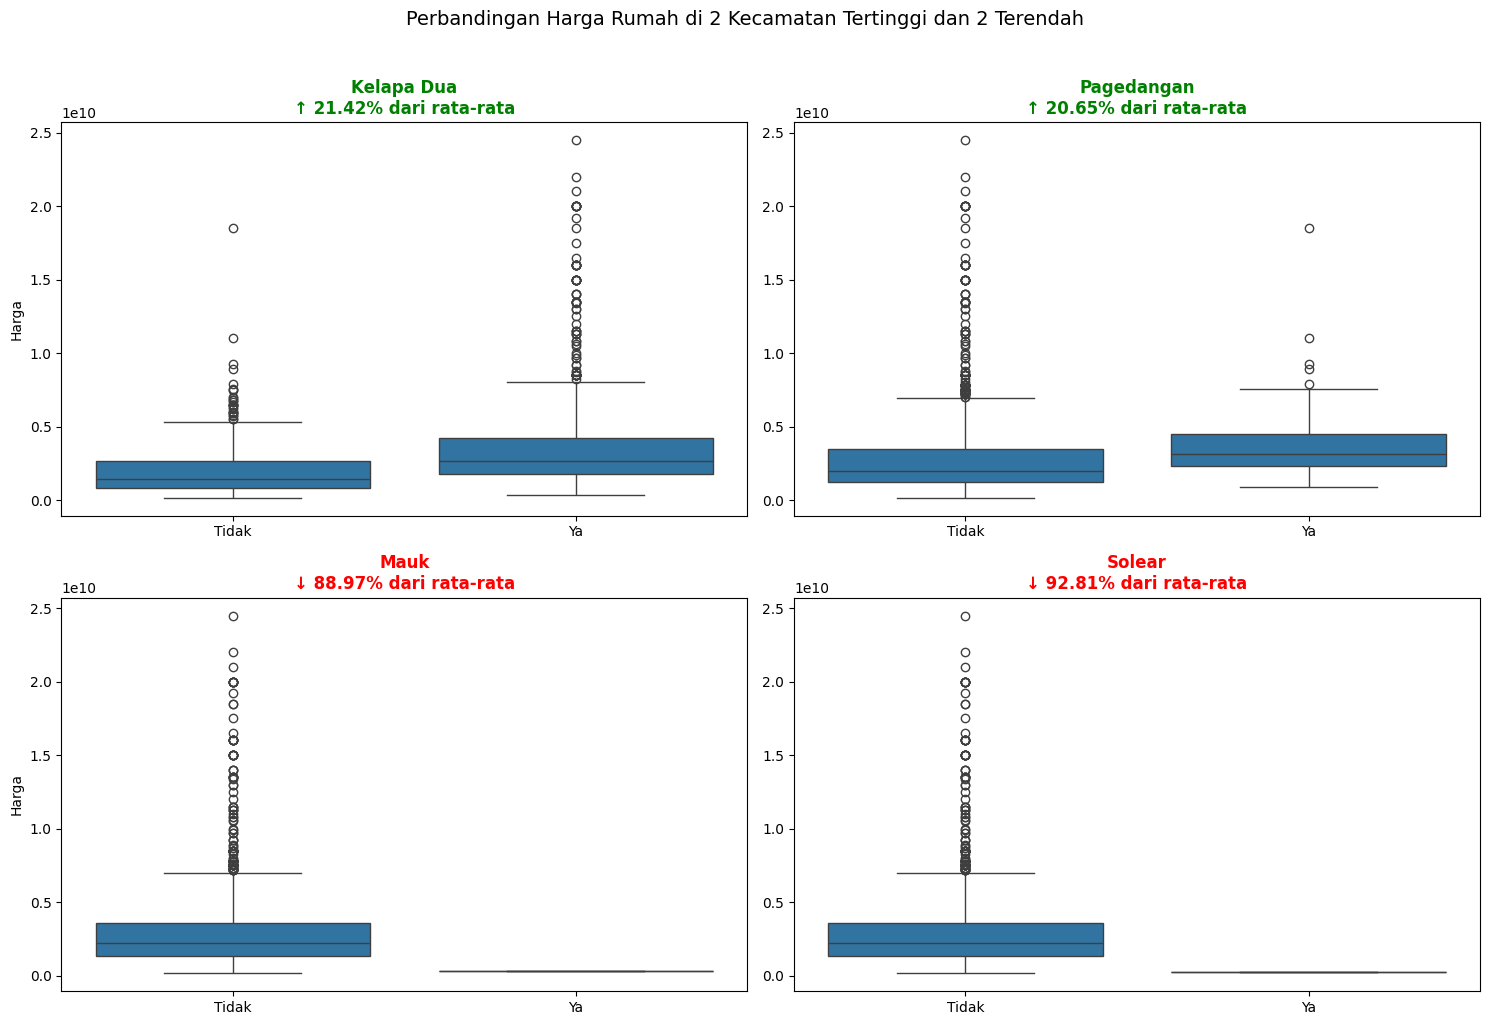


Perbandingan Harga:


,kecamatan,avg_price,pct_diff
7,Kelapa Dua,3.632154e+09,21.416651
12,Pagedangan,3.609286e+09,20.652199
11,Mauk,3.300000e+08,-88.968669
18,Solear,2.150000e+08,-92.812921


In [ ]:
# Select all columns containing 'kec_' (one-hot encoding results)
categorical_vars = [col for col in df_kabupaten.columns if col.startswith('kec_')]

# Calculate overall average price
avg_price_overall = df_kabupaten['Harga'].mean()

# Calculate average price and percentage difference for each district
kecamatan_data = []
for cat_var in categorical_vars:
    kec_name = cat_var.replace('kec_', '')
    avg_price = df_kabupaten[df_kabupaten[cat_var] == 1]['Harga'].mean()
    pct_diff = ((avg_price - avg_price_overall) / avg_price_overall) * 100
    kecamatan_data.append({'kecamatan': kec_name, 'avg_price': avg_price, 'pct_diff': pct_diff})

# Create DataFrame from calculation results
df_kecamatan = pd.DataFrame(kecamatan_data)

# Sort by percentage difference
df_kecamatan_sorted = df_kecamatan.sort_values('pct_diff', ascending=False)

# Get top 2 highest and bottom 2 lowest
top_2 = df_kecamatan_sorted.head(2)
bottom_2 = df_kecamatan_sorted.tail(2)

# Combine data for plotting
selected_kecamatan = pd.concat([top_2, bottom_2])

# Create plot for 4 selected districts
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, (idx, row) in enumerate(selected_kecamatan.iterrows()):
    cat_var = 'kec_' + row['kecamatan']
    sns.boxplot(x=df_kabupaten[cat_var], y=df_kabupaten['Harga'], ax=axes[i])
    
    # Format title with different colors for high/low
    if row['pct_diff'] > 0:
        title_color = 'green'
        direction = "↑"
    else:
        title_color = 'red'
        direction = "↓"
    
    title = f"{row['kecamatan']}\n{direction} {abs(row['pct_diff']):.2f}% dari rata-rata"
    axes[i].set_title(title, color=title_color, fontweight='bold')
    
    # Set X-axis labels
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Tidak', 'Ya'])
    axes[i].set_ylabel('Harga' if i % 2 == 0 else '')
    axes[i].set_xlabel('')

plt.suptitle('Perbandingan Harga Rumah di 2 Kecamatan Tertinggi dan 2 Terendah', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# Display comparison table
print("\nPerbandingan Harga:")
display(selected_kecamatan[['kecamatan', 'avg_price', 'pct_diff']].sort_values('pct_diff', ascending=False))

#### Outliers Handling

Outliers in the Harga column were capped using the IQR method to prevent extreme values from skewing the model's performance. This is preferred over removal to retain as much data as possible.

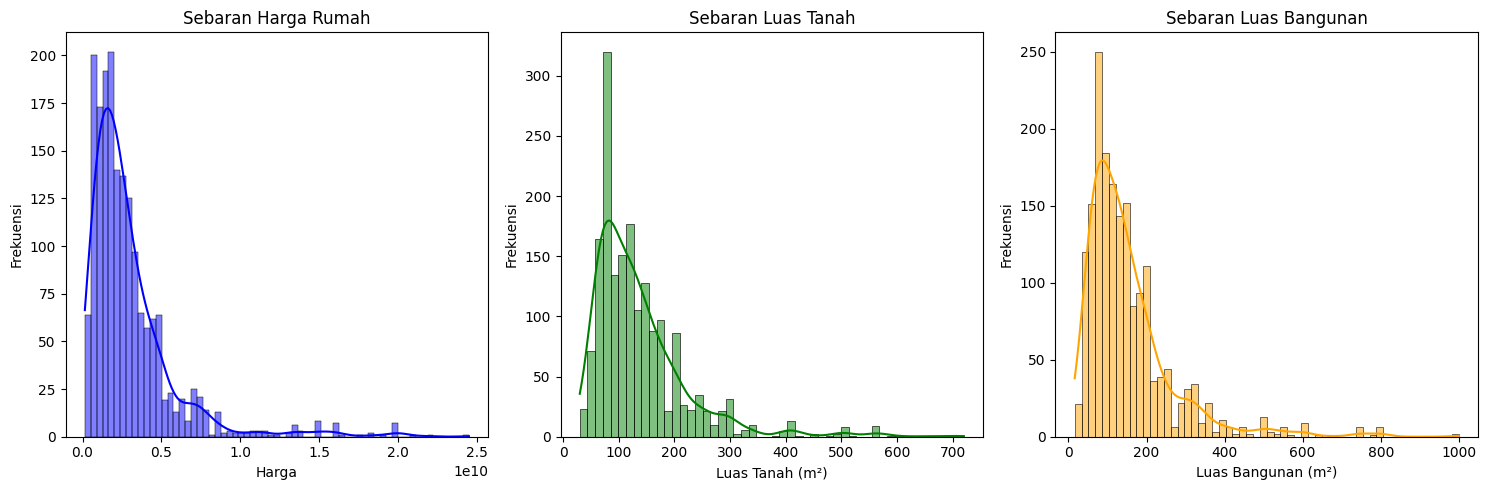

In [ ]:
# Setting the plot size
plt.figure(figsize=(15, 5))

# Plot for price
plt.subplot(1, 3, 1)  # 1 row, 3 columns, subplot 1
sns.histplot(df_kabupaten['Harga'], kde=True, color='blue')
plt.title('Sebaran Harga Rumah')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

# Plot for land area
plt.subplot(1, 3, 2)  # 1 row, 3 columns, subplot 2
sns.histplot(df_kabupaten['Luas Tanah'], kde=True, color='green')
plt.title('Sebaran Luas Tanah')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Frekuensi')

# Plot for building area
plt.subplot(1, 3, 3)  # 1 row, 3 columns, subplot 3
sns.histplot(df_kabupaten['Luas Bangunan'], kde=True, color='orange')
plt.title('Sebaran Luas Bangunan')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Frekuensi')

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
# Check skewness
print("Skewness of the 'Harga' column distribution: ", np.round(df_kabupaten['Harga'].skew(), 2))
print("Skewness of the 'Luas Tanah' column distribution: ", np.round(df_kabupaten['Luas Tanah'].skew(), 2))
print("Skewness of the 'Luas Bangunan' column distribution: ", np.round(df_kabupaten['Luas Bangunan'].skew(), 2))

Skewness distribusi kolom Harga:  3.08
Skewness distribusi kolom Luas Tanah:  2.4
Skewness distribusi kolom Luas Bangunan:  2.63


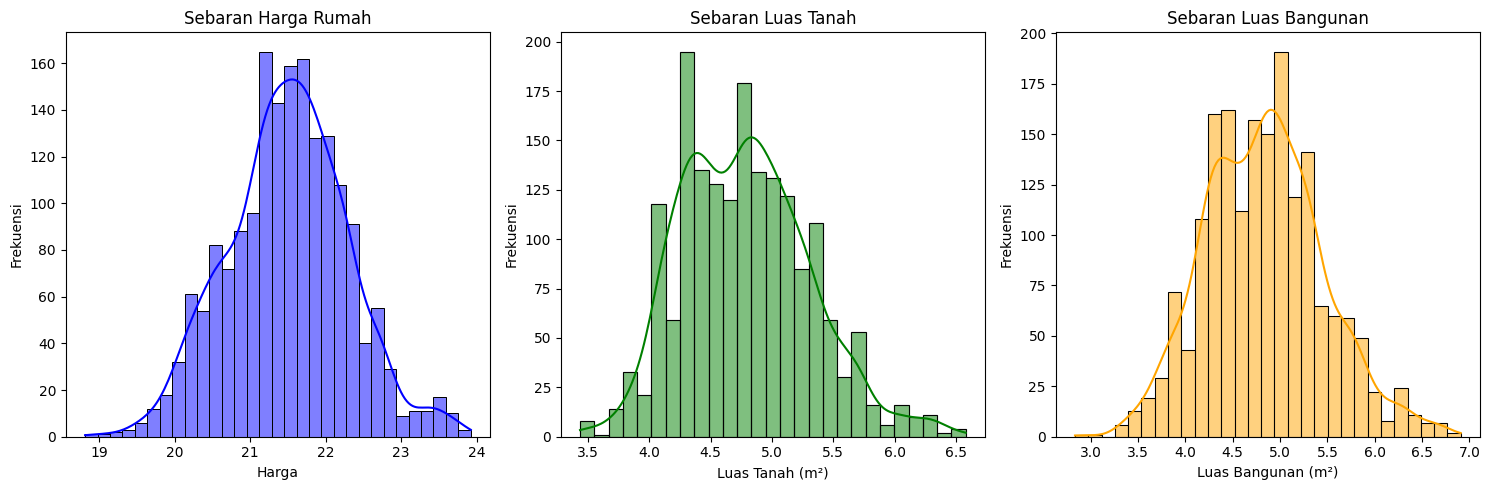

In [ ]:
# Perform a log transformation on the ‘Price’, ‘Land Area’, and ‘Building Area’ columns.
df_kabupaten['Harga'] = np.log1p(df_kabupaten['Harga'])
df_kabupaten['Luas Tanah'] = np.log1p(df_kabupaten['Luas Tanah'])
df_kabupaten['Luas Bangunan'] = np.log1p(df_kabupaten['Luas Bangunan'])

# Displaying price distribution after transformation
# Setting plot size
plt.figure(figsize=(15, 5))

# Plot for price
plt.subplot(1, 3, 1)  # 1 row, 3 columns, subplot 1
sns.histplot(df_kabupaten['Harga'], kde=True, color='blue')
plt.title('Sebaran Harga Rumah')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

# Plot for land area
plt.subplot(1, 3, 2)  # 1 row, 3 columns, subplot 2
sns.histplot(df_kabupaten['Luas Tanah'], kde=True, color='green')
plt.title('Sebaran Luas Tanah')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Frekuensi')

# Plot for building area
plt.subplot(1, 3, 3)  # 1 row, 3 columns, subplot 3
sns.histplot(df_kabupaten['Luas Bangunan'], kde=True, color='orange')
plt.title('Sebaran Luas Bangunan')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Frekuensi')

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
# View the top 5 data after encoding
df_kabupaten.head()

,Harga,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Jumlah Lantai,Kondisi Properti,Carport,...,kec_Mauk,kec_Pagedangan,kec_Panongan,kec_Pasar Kemis,kec_Rajeg,kec_Sepatan,kec_Sindang Jaya,kec_Solear,kec_Teluk Naga,kec_Tigaraksa
6,20.723266,2,1,4.51086,4.025352,3.0,3.0,1,1.0,1,...,False,False,False,False,False,False,False,False,False,False
8,20.723266,2,1,4.51086,4.025352,3.0,3.0,1,1.0,1,...,False,False,False,False,False,False,False,False,False,False
14,20.723266,3,2,6.46925,4.912655,3.0,2.0,1,1.0,1,...,False,False,False,False,False,False,False,False,False,False
15,20.723266,3,2,4.204693,4.382027,3.0,5.0,2,1.0,1,...,False,False,False,True,False,False,False,False,False,False
21,20.723266,3,3,4.795791,5.117994,3.0,2.0,2,2.0,2,...,False,False,False,False,False,False,False,False,False,False


#### Feature Selection

Using pearson correlation.

<Axes: >

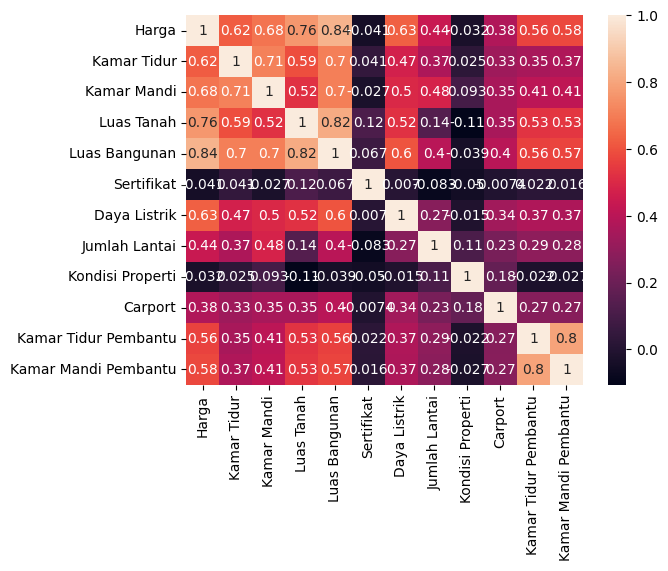

In [ ]:
# See the correlation between numerical variables (Pearson)
sns.heatmap(df_kabupaten.select_dtypes(include=['number']).corr(), annot=True)

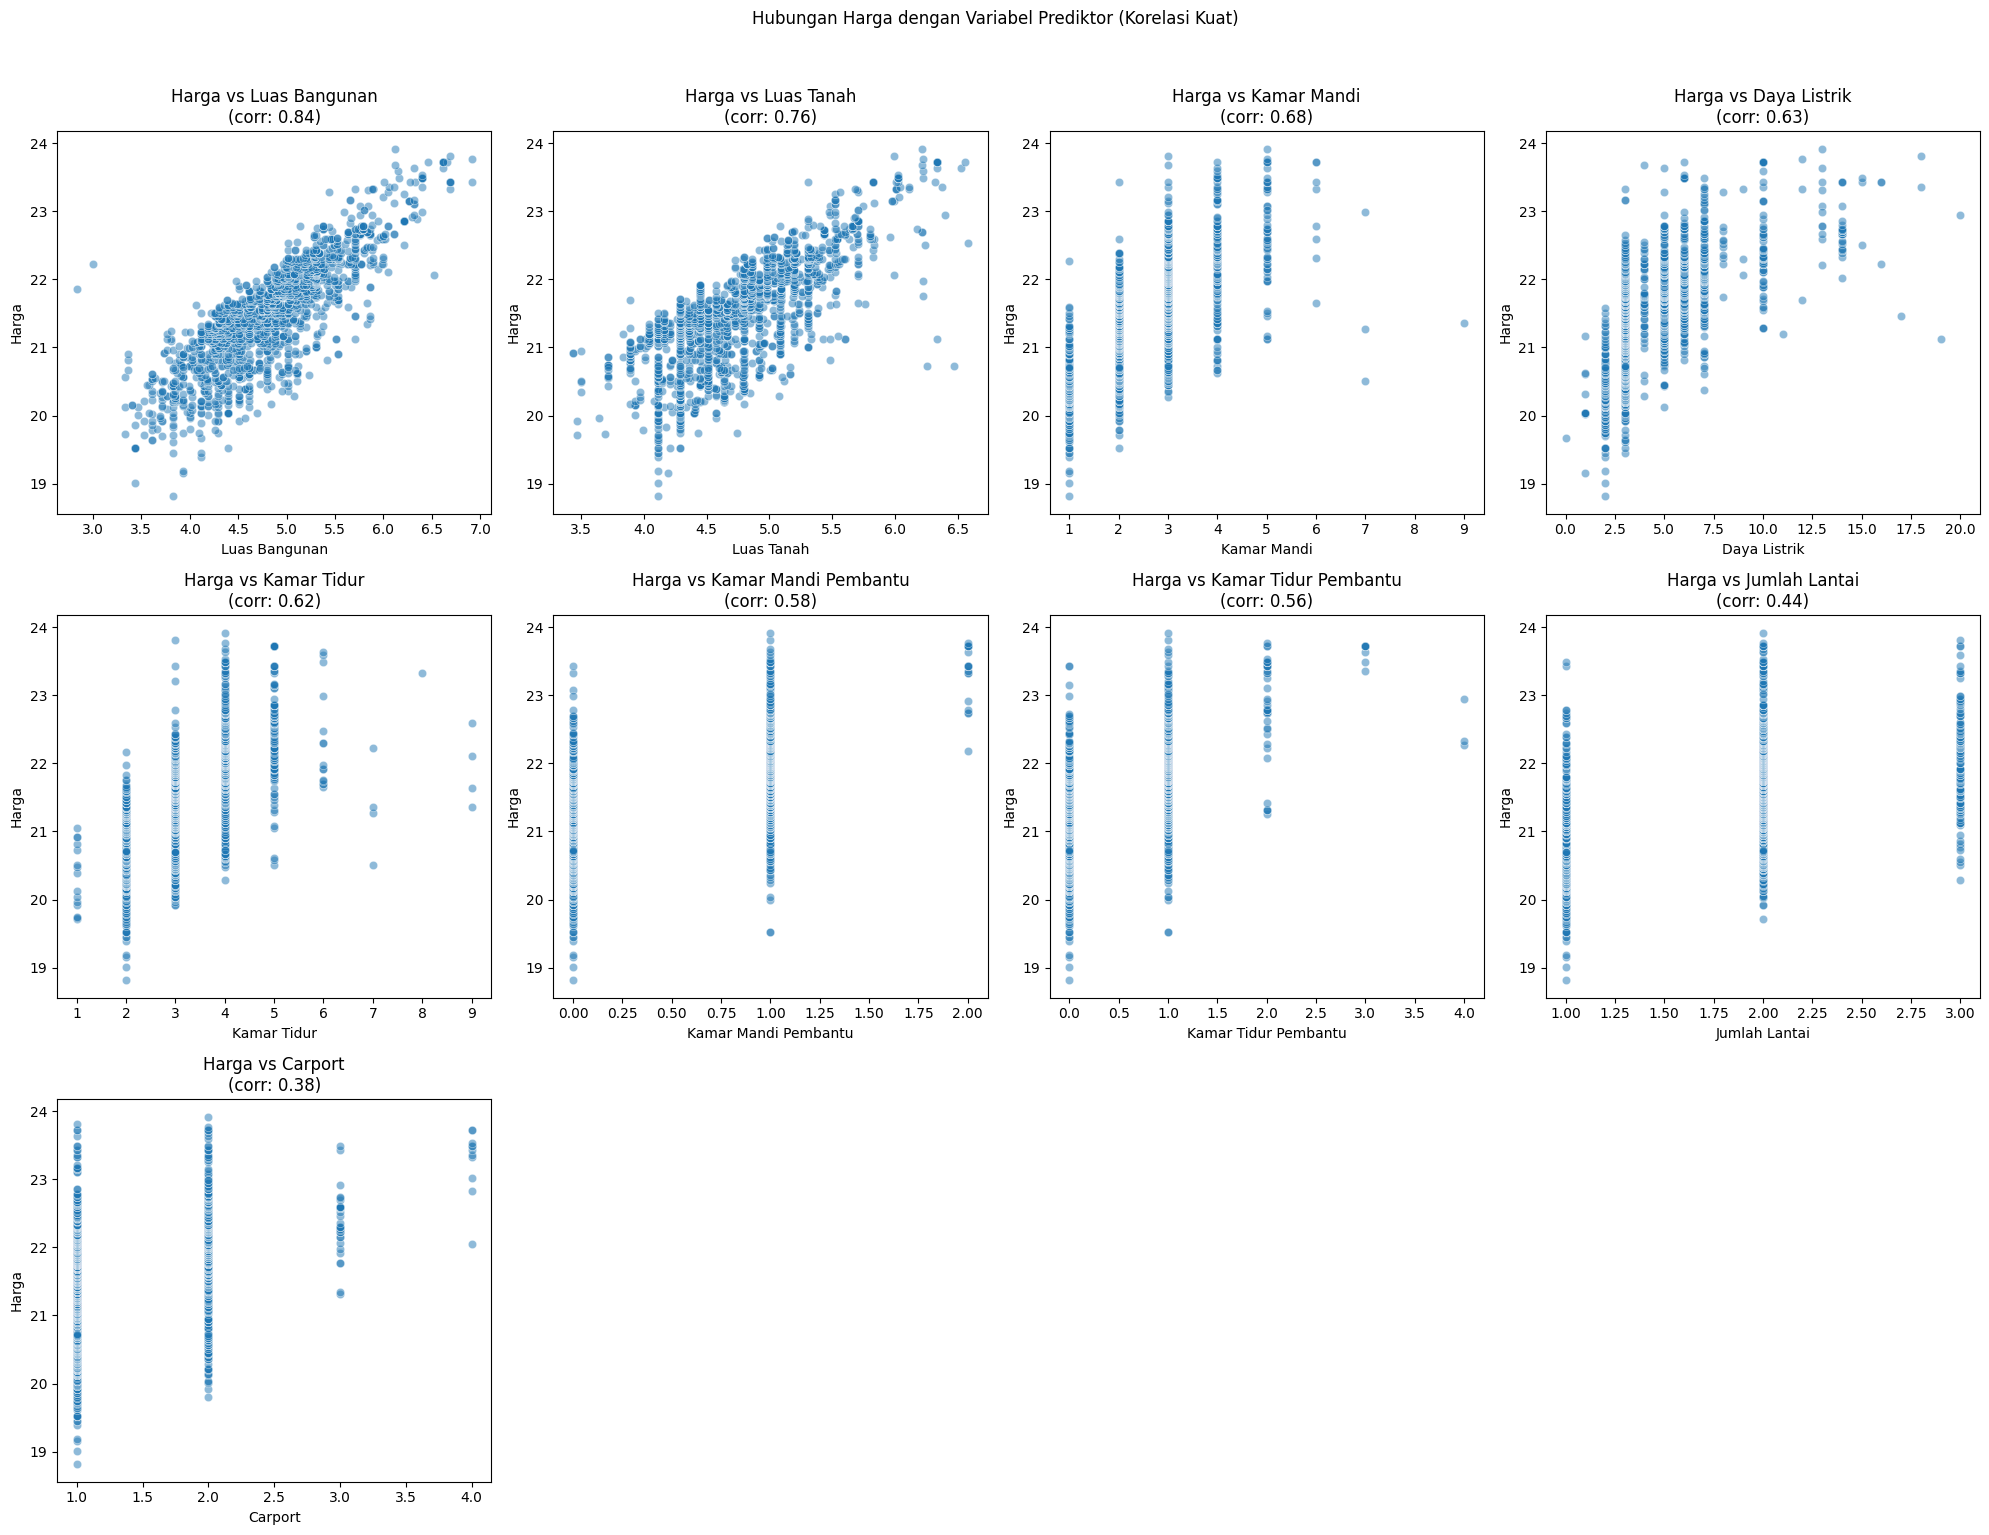

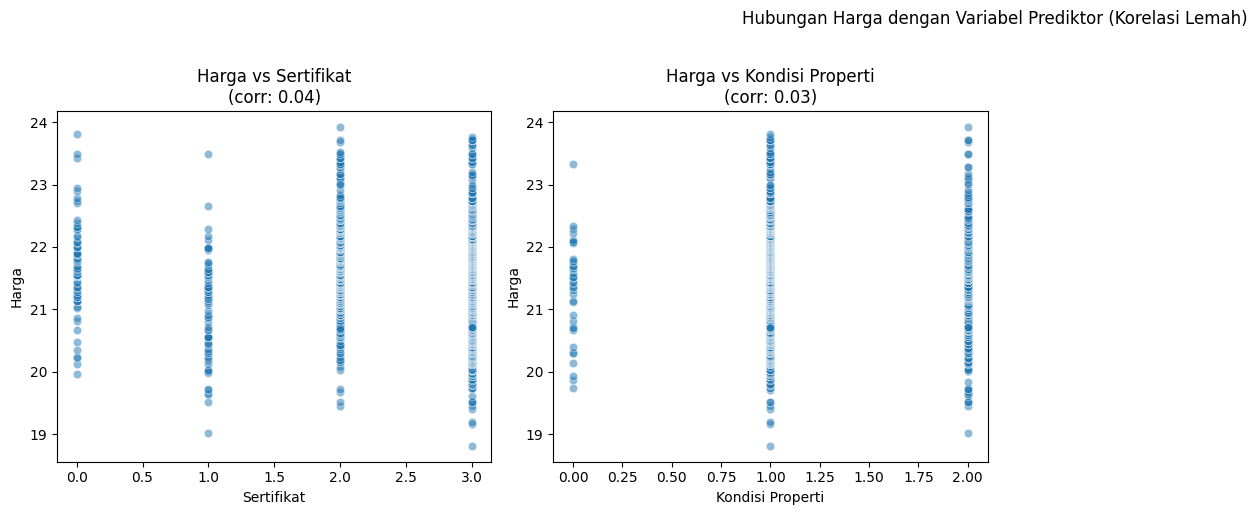

In [ ]:
# Select all numeric columns except the target (Price) and columns you want to exclude.
excluded_columns = ['Harga']
numerical_vars = [col for col in df_kabupaten.select_dtypes(include=['int64', 'float64']).columns if col not in excluded_columns]

# Calculate correlation with target
correlations = df_kabupaten[numerical_vars].corrwith(df_kabupaten['Harga']).abs().sort_values(ascending=False)

# Separate variables based on correlation strength
threshold = 0.3  # Threshold for determining strong/weak correlation
strong_corr_vars = correlations[correlations > threshold].index.tolist()
weak_corr_vars = correlations[correlations <= threshold].index.tolist()

# Function to create a scatter plot grid
def create_scatter_grid(variables, title):
    num_vars = len(variables)
    if num_vars == 0:
        return
    
    num_cols = 4
    num_rows = -(-num_vars // num_cols)  # Ceil division
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows), squeeze=False)
    axes = axes.flatten()
    
    for i, var in enumerate(variables):
        sns.scatterplot(x=df_kabupaten[var], y=df_kabupaten['Harga'], ax=axes[i], alpha=0.5)
        axes[i].set_title(f'Harga vs {var}\n(corr: {correlations[var]:.2f})')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Harga')
    
    # Delete empty subplots
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

# Plot variables with strong correlations
create_scatter_grid(strong_corr_vars, 'Hubungan Harga dengan Variabel Prediktor (Korelasi Kuat)')

# Plot variables with weak correlations
create_scatter_grid(weak_corr_vars, 'Hubungan Harga dengan Variabel Prediktor (Korelasi Lemah)')

#### Data Splitting
Drop the 'Sertifikat' and 'Kondisi Properti' columns due to low correlation values (close to 0).

In [ ]:
# Separate features and targets
X = df_kabupaten.drop(columns=['Harga', 'Sertifikat', 'Kondisi Properti'], axis=1)
y = df_kabupaten['Harga']

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# View predictor variable information
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1798 entries, 6 to 4990
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kamar Tidur           1798 non-null   Int64  
 1   Kamar Mandi           1798 non-null   Int64  
 2   Luas Tanah            1798 non-null   Float64
 3   Luas Bangunan         1798 non-null   Float64
 4   Daya Listrik          1798 non-null   float64
 5   Jumlah Lantai         1798 non-null   Int64  
 6   Carport               1798 non-null   Int64  
 7   Kamar Tidur Pembantu  1798 non-null   Int64  
 8   Kamar Mandi Pembantu  1798 non-null   Int64  
 9   kec_Balaraja          1798 non-null   bool   
 10  kec_Cikupa            1798 non-null   bool   
 11  kec_Cisauk            1798 non-null   bool   
 12  kec_Curug             1798 non-null   bool   
 13  kec_Jatiuwung         1798 non-null   bool   
 14  kec_Jayanti           1798 non-null   bool   
 15  kec_Kadu              1798

### Modeling & Evaluation

ML algorithm used:
1. Multiple Linear Regression (MLR) as base model
2. Random Forest
3. XGBoost
4. Random Forest with Optuna hyperparameter-tuned
5. XGBoost with Optuna hyperparameter-tuned

---
Multiple Linear Regression (Base Model)

In [ ]:
# Inisialisasi model Linear Regression
lr = LinearRegression()

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definisikan metrik
rmse_scorer = make_scorer(lambda y_true, y_pred: root_mean_squared_error(y_true, y_pred), greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Lakukan cross-validation
mean_cv_r2_lr_scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2')
mean_cv_rmse_lr_scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring=rmse_scorer)
mean_cv_mape_lr_scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring=mape_scorer)

# Tampilkan hasil rata-rata cross-validation
print("Cross validation score on base Multiple Linear Regression:")
print(f"Mean CV R²: {np.mean(mean_cv_r2_lr_scores):.4f}")
print(f"Mean CV RMSE: {np.abs(np.mean(mean_cv_rmse_lr_scores)):.4f}")  # RMSE negatif diubah ke positif
print(f"Mean CV MAPE: {np.abs(np.mean(mean_cv_mape_lr_scores)):.4f}")

# **Latih ulang model pada seluruh data pelatihan setelah cross-validation**
lr.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_lr_train = lr.predict(X_train)

# Menghitung metrik pada data uji
train_r2_base_lr = r2_score(y_train, y_pred_lr_train)
train_rmse_base_lr = root_mean_squared_error(y_train, y_pred_lr_train)
train_mape_base_lr = mean_absolute_percentage_error(y_train, y_pred_lr_train)

# Melakukan prediksi pada data uji
y_pred_lr = lr.predict(X_test)

# Menghitung metrik pada data uji
test_r2_base_lr = r2_score(y_test, y_pred_lr)
test_rmse_base_lr = root_mean_squared_error(y_test, y_pred_lr)
test_mape_base_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print("\nMultiple Linear Regression Result:")
print(f"Train R²: {train_r2_base_lr:.4f}")
print(f"Train RMSE: {train_rmse_base_lr:.4f}")
print(f"Train MAPE: {train_mape_base_lr:.4f}")
print(f"\nTest R²: {test_r2_base_lr:.4f}")
print(f"Test RMSE: {test_rmse_base_lr:.4f}")
print(f"Test MAPE: {test_mape_base_lr:.4f}")

Cross validation score on base Multiple Linear Regression:
Mean CV R²: 0.8646
Mean CV RMSE: 0.2901
Mean CV MAPE: 0.0102

Multiple Linear Regression Result:
Train R²: 0.8778
Train RMSE: 0.2761
Train MAPE: 0.0098

Test R²: 0.8830
Test RMSE: 0.2790
Test MAPE: 0.0099


Base Model Random Forest

In [ ]:
# Inisialisasi model
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation otomatis
r2_scores = cross_val_score(rfr, X_train, y_train, cv=kf, scoring="r2")
rmse_scores = np.sqrt(-cross_val_score(rfr, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"))
mape_scores = cross_val_score(rfr, X_train, y_train, cv=kf, scoring="neg_mean_absolute_percentage_error") * -1

# Menghitung rata-rata metrik dari cross-validation
mean_r2_base_rfr = np.mean(r2_scores)
mean_rmse_base_rfr = np.mean(rmse_scores)
mean_mape_base_rfr = np.mean(mape_scores)

print("Cross-validation score on base Random Forest:")
print(f"Mean CV R²: {mean_r2_base_rfr:.4f}")
print(f"Mean CV RMSE: {mean_rmse_base_rfr:.4f}")
print(f"Mean CV MAPE: {mean_mape_base_rfr:.4f}")

# Melatih model pada seluruh data pelatihan
rfr.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_rf_train = rfr.predict(X_train)

# Menghitung metrik pada data latih
train_r2_base_rfr = r2_score(y_train, y_pred_rf_train)
train_rmse_base_rfr = root_mean_squared_error(y_train, y_pred_rf_train)
train_mape_base_rfr = mean_absolute_percentage_error(y_train, y_pred_rf_train)

# Melakukan prediksi pada data uji
y_pred_rf = rfr.predict(X_test)

# Menghitung metrik pada data uji
test_r2_base_rfr = r2_score(y_test, y_pred_rf)
test_rmse_base_rfr = root_mean_squared_error(y_test, y_pred_rf)
test_mape_base_rfr = mean_absolute_percentage_error(y_test, y_pred_rf)

print("\nBase Random Forest Result:")
print(f"Train R²: {train_r2_base_rfr:.4f}")
print(f"Train RMSE: {train_rmse_base_rfr:.4f}")
print(f"Train MAPE: {train_mape_base_rfr:.4f}\n")
print(f"Test R²: {test_r2_base_rfr:.4f}")
print(f"Test RMSE: {test_rmse_base_rfr:.4f}")
print(f"Test MAPE: {test_mape_base_rfr:.4f}")

Cross-validation score on base Random Forest:
Mean CV R²: 0.8872
Mean CV RMSE: 0.2646
Mean CV MAPE: 0.0084

Base Random Forest Result:
Train R²: 0.9858
Train RMSE: 0.0941
Train MAPE: 0.0030

Test R²: 0.9180
Test RMSE: 0.2336
Test MAPE: 0.0072


Base Model XGBoost

In [ ]:
# Inisialisasi model
xgb = XGBRegressor(verbosity=0, n_jobs=-1, random_state=42)

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation otomatis
r2_scores = cross_val_score(xgb, X_train, y_train, cv=kf, scoring="r2")
rmse_scores = np.sqrt(-cross_val_score(xgb, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"))
mape_scores = cross_val_score(xgb, X_train, y_train, cv=kf, scoring="neg_mean_absolute_percentage_error") * -1

# Menghitung rata-rata metrik dari cross-validation
mean_r2_base_xgb = np.mean(r2_scores)
mean_rmse_base_xgb = np.mean(rmse_scores)
mean_mape_base_xgb = np.mean(mape_scores)

print("Cross-validation score on base XGBoost:")
print(f"Mean CV R²: {mean_r2_base_xgb:.4f}")
print(f"Mean CV RMSE: {mean_rmse_base_xgb:.4f}")
print(f"Mean CV MAPE: {mean_mape_base_xgb:.4f}")

# Melatih model pada seluruh data pelatihan
xgb.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_xgb_train = xgb.predict(X_train)

# Menghitung metrik pada data latih
train_r2_base_xgb = r2_score(y_train, y_pred_xgb_train)
train_rmse_base_xgb = root_mean_squared_error(y_train, y_pred_xgb_train)
train_mape_base_xgb = mean_absolute_percentage_error(y_train, y_pred_xgb_train)

# Melakukan prediksi pada data uji
y_pred_xgb = xgb.predict(X_test)

# Menghitung metrik pada data uji
test_r2_base_xgb = r2_score(y_test, y_pred_xgb)
test_rmse_base_xgb = root_mean_squared_error(y_test, y_pred_xgb)
test_mape_base_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\nBase XGBoost Result:")
print(f"Train R²: {train_r2_base_xgb:.4f}")
print(f"Train RMSE: {train_rmse_base_xgb:.4f}")
print(f"Train MAPE: {train_mape_base_xgb:.4f}\n")
print(f"Test R²: {test_r2_base_xgb:.4f}")
print(f"Test RMSE: {test_rmse_base_xgb:.4f}")
print(f"Test MAPE: {test_mape_base_xgb:.4f}")

Cross-validation score on base XGBoost:
Mean CV R²: 0.8881
Mean CV RMSE: 0.2636
Mean CV MAPE: 0.0085

Base XGBoost Result:
Train R²: 0.9905
Train RMSE: 0.0770
Train MAPE: 0.0025

Test R²: 0.9246
Test RMSE: 0.2240
Test MAPE: 0.0071


Random Forest dengan Optuna

In [32]:
# Fungsi Optuna untuk tuning Random Forest
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1200, 2000, step=100),
        "max_depth": trial.suggest_int("max_depth", 20, 50, step=5),
        "min_samples_split": trial.suggest_int("min_samples_split", 4, 12),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_float("max_features", 0.4, 0.7),
        "bootstrap": True,
        "max_samples": trial.suggest_float("max_samples", 0.8, 0.95),
        "ccp_alpha": trial.suggest_float("ccp_alpha", 0.0, 0.005),
        "warm_start": True,
        "oob_score": True
    }

    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)

    # Gunakan 5-Fold Cross Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Evaluasi dengan cross_val_score menggunakan 5-Fold CV
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    rmse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
    mape_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_percentage_error", n_jobs=-1)

    # Simpan hasil cross-validation
    global mean_cv_r2_opt_rfr, mean_cv_rmse_opt_rfr, mean_cv_mape_opt_rfr
    mean_cv_r2_opt_rfr = np.mean(r2_scores)
    mean_cv_rmse_opt_rfr = np.mean(rmse_scores)
    mean_cv_mape_opt_rfr = np.mean(mape_scores)

    return mean_cv_r2_opt_rfr  # Ambil rata-rata R² sebagai metric utama

# Jalankan Optuna
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective, n_trials=100)

# Print hasil tuning terbaik
print("Best hyperparameters for Random Forest:", study_rf.best_params)

# Latih model final dengan hyperparameter terbaik
best_params_rf = study_rf.best_params
final_rf = RandomForestRegressor(**best_params_rf, random_state=42, n_jobs=-1)
final_rf.fit(X_train, y_train)

# Evaluasi model di data latih
y_pred_opt_rf_train = final_rf.predict(X_train)
train_rmse_opt_rfr = root_mean_squared_error(y_train, y_pred_opt_rf_train)
train_r2_opt_rfr = r2_score(y_train, y_pred_opt_rf_train)
train_mape_opt_rfr = mean_absolute_percentage_error(y_train, y_pred_opt_rf_train)

# Evaluasi model di data uji
y_pred_opt_rf = final_rf.predict(X_test)
test_rmse_opt_rfr = root_mean_squared_error(y_test, y_pred_opt_rf)
test_r2_opt_rfr = r2_score(y_test, y_pred_opt_rf)
test_mape_opt_rfr = mean_absolute_percentage_error(y_test, y_pred_opt_rf)

print("\nRandom Forest Optuna Result:")
print("\nCross-validation score:")
print(f"Mean CV R²: {mean_cv_r2_opt_rfr:.4f}")
print(f"Mean CV RMSE: {mean_cv_rmse_opt_rfr:.4f}")
print(f"Mean CV MAPE: {mean_cv_mape_opt_rfr:.4f}\n")
print(f"Train R²: {train_r2_opt_rfr:.4f}")
print(f"Train RMSE: {train_rmse_opt_rfr:.4f}")
print(f"Train MAPE: {train_mape_opt_rfr:.4f}\n")
print(f"Test R²: {test_r2_opt_rfr:.4f}")
print(f"Test RMSE: {test_rmse_opt_rfr:.4f}")
print(f"Test MAPE: {test_mape_opt_rfr:.4f}")

[I 2025-09-29 11:28:40,775] A new study created in memory with name: no-name-dc223094-2a70-4ec0-8ae8-4a3c42c90901
[I 2025-09-29 11:29:03,060] Trial 0 finished with value: 0.8532019229584137 and parameters: {'n_estimators': 1700, 'max_depth': 35, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.6369750241133091, 'max_samples': 0.9264868666518972, 'ccp_alpha': 0.0027923889969495254}. Best is trial 0 with value: 0.8532019229584137.
[I 2025-09-29 11:29:14,063] Trial 1 finished with value: 0.8810321493153118 and parameters: {'n_estimators': 1200, 'max_depth': 50, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 0.4283708198410835, 'max_samples': 0.8370864145901631, 'ccp_alpha': 0.00025391897286097196}. Best is trial 1 with value: 0.8810321493153118.
[I 2025-09-29 11:29:26,350] Trial 2 finished with value: 0.8380729573030992 and parameters: {'n_estimators': 1700, 'max_depth': 35, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 0.5236266570665451

Best hyperparameters for Random Forest: {'n_estimators': 1200, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.47617779609936284, 'max_samples': 0.9417919374261052, 'ccp_alpha': 6.95803316481637e-06}

Random Forest Optuna Result:

Cross-validation score:
Mean CV R²: 0.8427
Mean CV RMSE: 0.3125
Mean CV MAPE: 0.0111

Train R²: 0.9773
Train RMSE: 0.1191
Train MAPE: 0.0040

Test R²: 0.9182
Test RMSE: 0.2333
Test MAPE: 0.0075


XGBoost dengan Optuna

In [33]:
# Definisikan fungsi tujuan untuk Optuna
def objective(trial):
    # Hyperparameter yang akan dioptimalkan
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1200, 2500, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.03, log=True),
        "max_depth": trial.suggest_int("max_depth", 4, 7),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 6),
        "subsample": trial.suggest_float("subsample", 0.85, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.75, 0.95),
        "gamma": trial.suggest_float("gamma", 0.1, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 1, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 5)
    }

    # Inisialisasi model XGBoost
    model = XGBRegressor(**params, random_state=42, n_jobs=-1)

    # Evaluasi dengan cross_val_score menggunakan 5-Fold CV
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    rmse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
    mape_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_percentage_error", n_jobs=-1)

    # Simpan hasil cross-validation
    global mean_cv_r2_opt_xgb, mean_cv_rmse_opt_xgb, mean_cv_mape_opt_xgb
    mean_cv_r2_opt_xgb = np.mean(r2_scores)
    mean_cv_rmse_opt_xgb = np.mean(rmse_scores)
    mean_cv_mape_opt_xgb = np.mean(mape_scores)

    return mean_cv_r2_opt_xgb  # Mengembalikan rata-rata R² sebagai nilai yang akan dioptimalkan

# Tuning hyperparameter dengan Optuna
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=100)

# Menampilkan hyperparameter terbaik
print("Best hyperparameters: ", study_xgb.best_params)

# Melatih model dengan hyperparameter terbaik
best_params = study_xgb.best_params
best_model_xgb = XGBRegressor(**best_params, random_state=42, n_jobs=-1)
best_model_xgb.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_opt_xgb_train = best_model_xgb.predict(X_train)

# Menghitung metrik pada data latih
train_r2_opt_xgb = r2_score(y_train, y_pred_opt_xgb_train)
train_rmse_opt_xgb = root_mean_squared_error(y_train, y_pred_opt_xgb_train)
train_mape_opt_xgb = mean_absolute_percentage_error(y_train, y_pred_opt_xgb_train)

# Melakukan prediksi pada data uji
y_pred_opt_xgb = best_model_xgb.predict(X_test)

# Menghitung metrik pada data uji
test_r2_opt_xgb = r2_score(y_test, y_pred_opt_xgb)
test_rmse_opt_xgb = root_mean_squared_error(y_test, y_pred_opt_xgb)
test_mape_opt_xgb = mean_absolute_percentage_error(y_test, y_pred_opt_xgb)

print("\nXGBoost Optuna Result:")
print("\nCross-validation score:")
print(f"Mean CV R²: {mean_cv_r2_opt_xgb:.4f}")
print(f"Mean CV RMSE: {mean_cv_rmse_opt_xgb:.4f}")
print(f"Mean CV MAPE: {mean_cv_mape_opt_xgb:.4f}\n")
print(f"Train R²: {train_r2_opt_xgb:.4f}")
print(f"Train RMSE: {train_rmse_opt_xgb:.4f}")
print(f"Train MAPE: {train_mape_opt_xgb:.4f}\n")
print(f"Test R²: {test_r2_opt_xgb:.4f}")
print(f"Test RMSE: {test_rmse_opt_xgb:.4f}")
print(f"Test MAPE: {test_mape_opt_xgb:.4f}")

[I 2025-09-29 11:51:23,067] A new study created in memory with name: no-name-621a4cc3-144e-4671-9944-0959e2d4c6a7
[I 2025-09-29 11:51:24,938] Trial 0 finished with value: 0.8725784525509424 and parameters: {'n_estimators': 1700, 'learning_rate': 0.013330851930419779, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.9960948861741484, 'colsample_bytree': 0.8495417172885277, 'gamma': 1.3130146600178159, 'reg_alpha': 2.1823354507624453, 'reg_lambda': 4.742885293098558}. Best is trial 0 with value: 0.8725784525509424.
[I 2025-09-29 11:51:26,248] Trial 1 finished with value: 0.8548345356351239 and parameters: {'n_estimators': 1300, 'learning_rate': 0.023454113345966466, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.9375395129584195, 'colsample_bytree': 0.8650223500425531, 'gamma': 2.8870224247834138, 'reg_alpha': 4.342339013143145, 'reg_lambda': 4.431090908078516}. Best is trial 0 with value: 0.8725784525509424.
[I 2025-09-29 11:51:27,627] Trial 2 finished with value: 0.87093331

Best hyperparameters:  {'n_estimators': 1800, 'learning_rate': 0.014637705905603277, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.8732903031807491, 'colsample_bytree': 0.9111392889872022, 'gamma': 0.10112728584007395, 'reg_alpha': 1.2669324197443288, 'reg_lambda': 3.266297307035436}

XGBoost Optuna Result:

Cross-validation score:
Mean CV R²: 0.8930
Mean CV RMSE: 0.2575
Mean CV MAPE: 0.0090

Train R²: 0.9303
Train RMSE: 0.2086
Train MAPE: 0.0072

Test R²: 0.9108
Test RMSE: 0.2436
Test MAPE: 0.0083


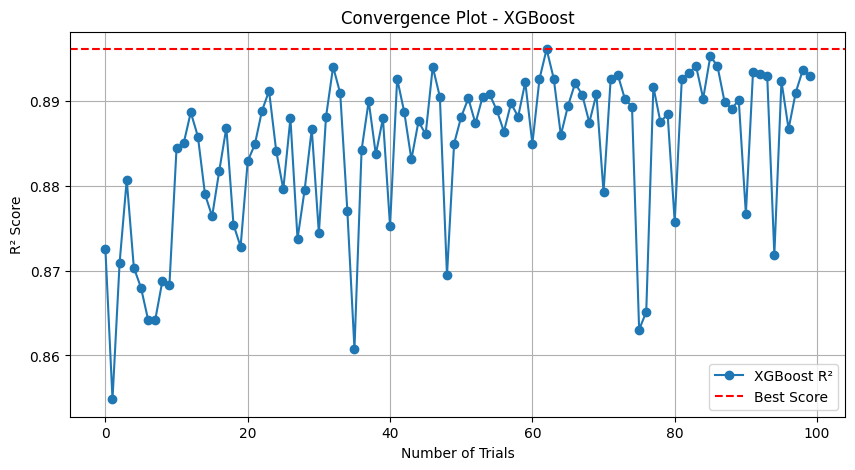

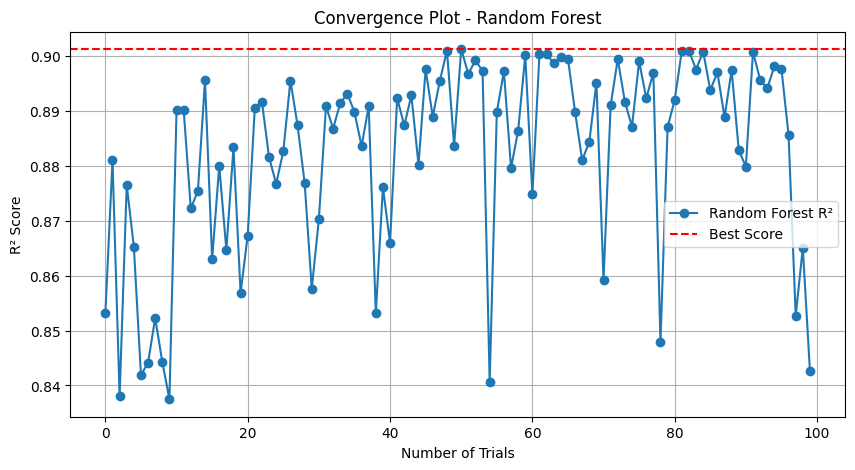

In [ ]:
# Function to display convergence plot
def plot_convergence(study, model_name):
    trials = study.trials_dataframe()
    
    plt.figure(figsize=(10, 5))
    plt.plot(trials["number"], trials["value"], marker="o", linestyle="-", label=f"{model_name} R²")
    plt.axhline(y=max(trials["value"]), color="r", linestyle="--", label="Best Score")
    
    plt.xlabel("Number of Trials")
    plt.ylabel("R² Score")
    plt.title(f"Convergence Plot - {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Displaying plots for XGBoost and Random Forest
plot_convergence(study_xgb, "XGBoost")
plot_convergence(study_rf, "Random Forest")

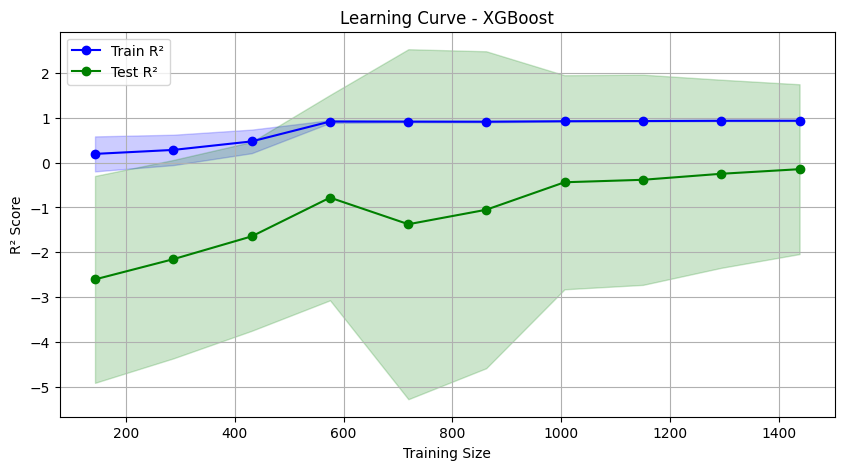

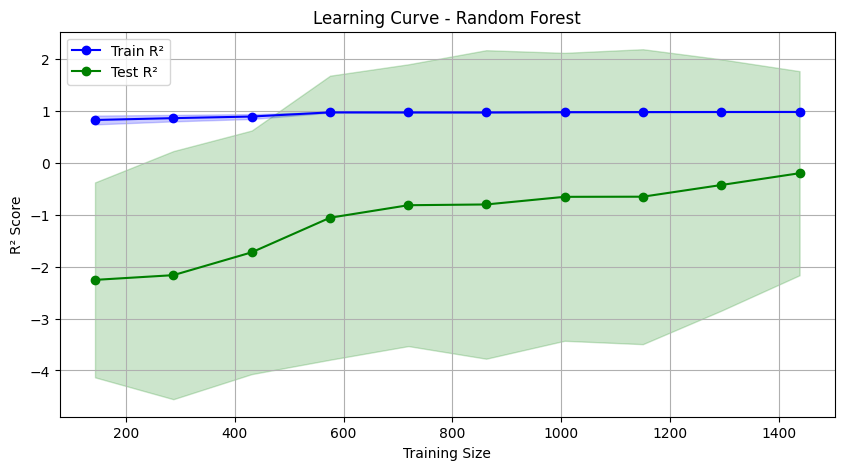

In [ ]:
# Create learning curve plot for random forest optuna-tuned and XGBoost Optuna-tuned
def plot_learning_curve(model, X, y, model_name):
    """Plot Learning Curve (Train vs Test)"""
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring="r2", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(train_sizes, train_mean, label="Train R²", marker="o", color="blue")
    plt.plot(train_sizes, test_mean, label="Test R²", marker="o", color="green")
    
    plt.fill_between(train_sizes, train_mean - np.std(train_scores, axis=1), 
                     train_mean + np.std(train_scores, axis=1), color="blue", alpha=0.2)
    plt.fill_between(train_sizes, test_mean - np.std(test_scores, axis=1), 
                     test_mean + np.std(test_scores, axis=1), color="green", alpha=0.2)
    
    plt.xlabel("Training Size")
    plt.ylabel("R² Score")
    plt.title(f"Learning Curve - {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Use the best model from Optuna
best_xgb = XGBRegressor(**study_xgb.best_params, random_state=42)
best_rf = RandomForestRegressor(**study_rf.best_params, random_state=42, n_jobs=-1)

# Plot Learning Curve
plot_learning_curve(best_xgb, X, y, "XGBoost")
plot_learning_curve(best_rf, X, y, "Random Forest")


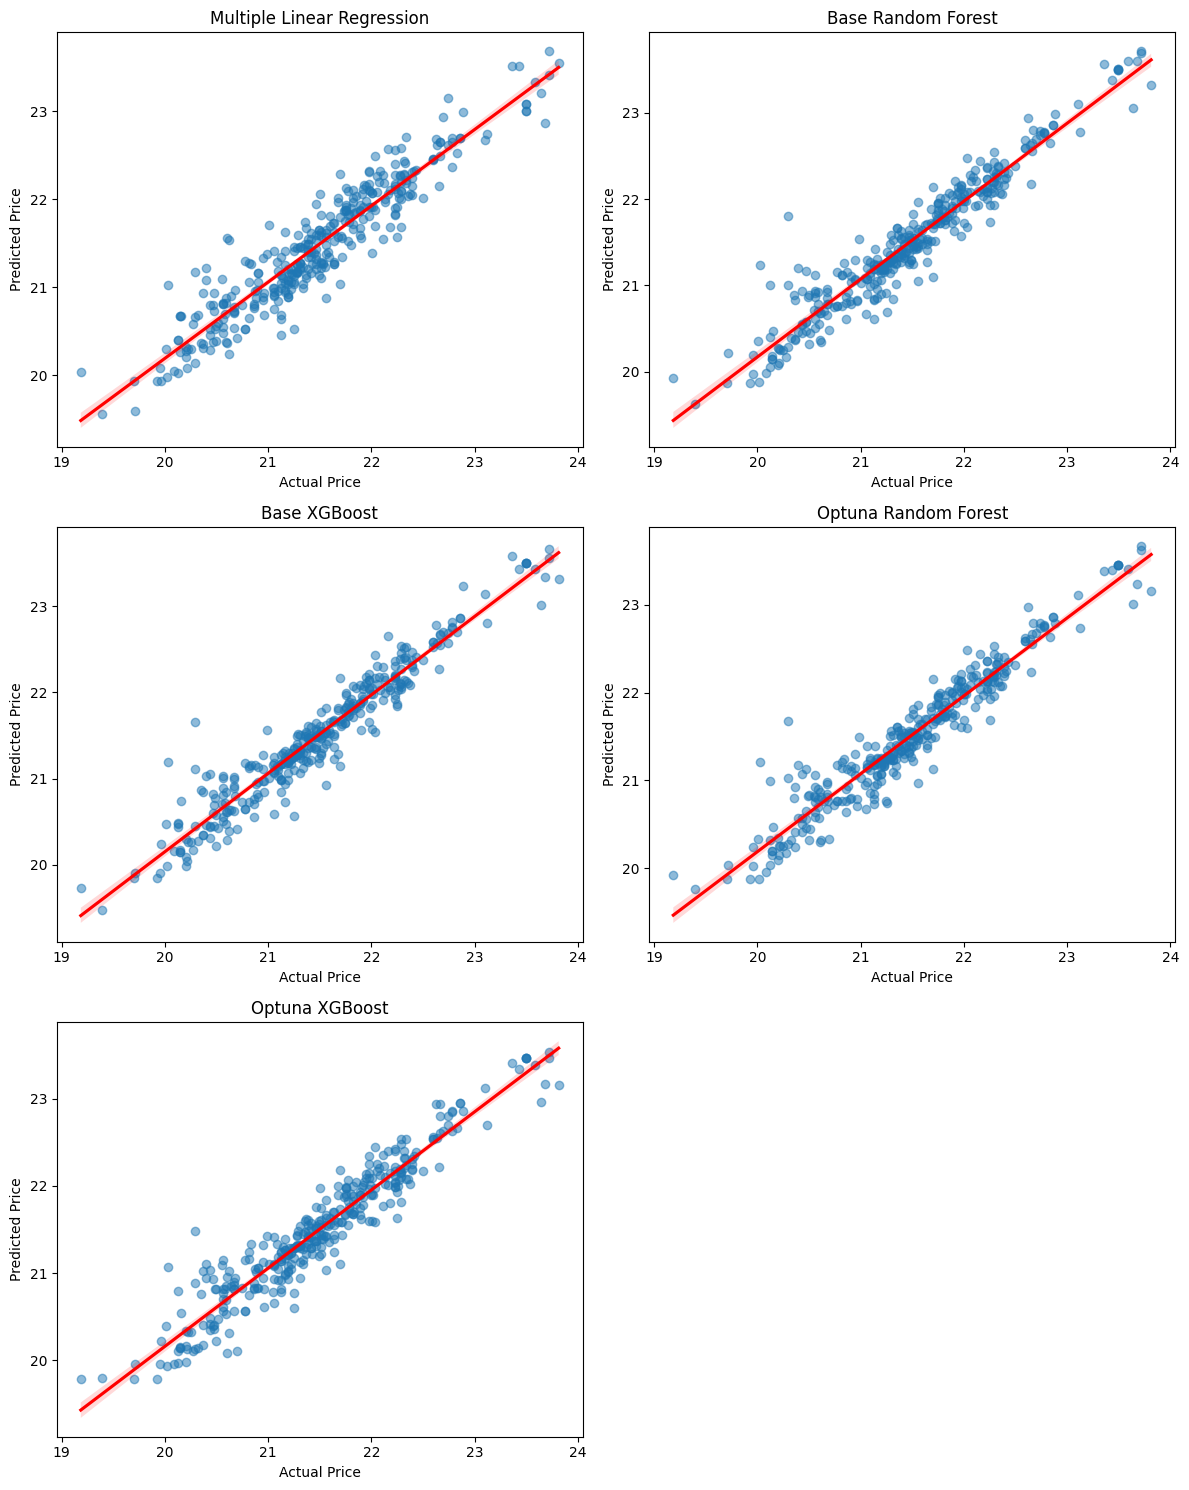

In [ ]:
# Create figures and axes for a 3x2 grid (since there are 5 models, one slot will be empty)
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Plot for Multiple Linear Regression
sns.regplot(x=y_test, y=y_pred_lr, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[0, 0])
axes[0, 0].set_title('Multiple Linear Regression')
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')

# Plot for Random Forest Base
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[0, 1])
axes[0, 1].set_title('Base Random Forest')
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')

# Plot for XGBoost Base
sns.regplot(x=y_test, y=y_pred_xgb, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[1, 0])
axes[1, 0].set_title('Base XGBoost')
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')

# Plot for Optuna Random Forest
sns.regplot(x=y_test, y=y_pred_opt_rf, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[1, 1])
axes[1, 1].set_title('Optuna Random Forest')
axes[1, 1].set_xlabel('Actual Price')
axes[1, 1].set_ylabel('Predicted Price')

# Plot for Optuna XGBoost
sns.regplot(x=y_test, y=y_pred_opt_xgb, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[2, 0])
axes[2, 0].set_title('Optuna XGBoost')
axes[2, 0].set_xlabel('Actual Price')
axes[2, 0].set_ylabel('Predicted Price')

# Remove empty subplot (axes[2,1])
fig.delaxes(axes[2, 1])

# Arrange the layout so that it does not collide
plt.tight_layout()
plt.show()

In [42]:
# Organize the predictions results into a dictionary
model_predictions = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'Random Forest (Optuna)': y_pred_opt_rf,
    'XGBoost (Optuna)': y_pred_opt_xgb
}

# Inverse transform the results to the actual values (only once)
y_test_actual = np.expm1(y_test)

# Build a single, consolidated DataFrame for comparison
comparison_dict = {'Actual': y_test_actual}

for name, pred_log in model_predictions.items():
    pred_actual = np.expm1(pred_log)
    comparison_dict[f'Predicted ({name})'] = pred_actual
    comparison_dict[f'Difference ({name})'] = pred_actual - y_test_actual

df_comparison = pd.DataFrame(comparison_dict)

# Display the first 5 rows with nice formatting
display(df_comparison.head(5).style.format('{:,.0f}'))

,Actual,Predicted (Linear Regression),Difference (Linear Regression),Predicted (Random Forest),Difference (Random Forest),Predicted (XGBoost),Difference (XGBoost),Predicted (Random Forest (Optuna)),Difference (Random Forest (Optuna)),Predicted (XGBoost (Optuna)),Difference (XGBoost (Optuna))
3513,"4,600,000,000","3,272,135,031","-1,327,864,969","3,347,585,527","-1,252,414,473","3,131,149,312","-1,468,850,688","3,314,013,032","-1,285,986,968","3,326,530,560","-1,273,469,440"
663,"1,500,000,000","1,860,344,336","360,344,336","895,751,769","-604,248,231","1,308,879,616","-191,120,384","1,240,939,425","-259,060,575","1,510,640,256","10,640,256"
4157,"6,950,000,000","6,905,083,525","-44,916,475","6,290,204,981","-659,795,019","6,250,821,632","-699,178,368","6,244,246,743","-705,753,257","6,545,646,592","-404,353,408"
1214,"1,880,000,000","2,162,109,399","282,109,399","2,574,020,445","694,020,445","2,160,856,576","280,856,576","2,416,167,769","536,167,769","2,103,088,640","223,088,640"
3496,"4,500,000,000","3,044,583,019","-1,455,416,981","3,903,115,725","-596,884,275","3,326,187,776","-1,173,812,224","3,728,271,604","-771,728,396","3,751,113,728","-748,886,272"


#### Overall Evaluation

In [38]:
df_eval_test = pd.DataFrame(data={
    'Model' : ['Multiple Linear Regression', 'Base Random Forest', 'Base XGBoost', 'Optuna Random Forest', 'Optuna XGBoost'],
    'R-squared' : [test_r2_base_lr, test_r2_base_rfr, test_r2_base_xgb, test_r2_opt_rfr, test_r2_opt_xgb],
    'RMSE' : [test_rmse_base_lr, test_rmse_base_rfr, test_rmse_base_xgb, test_rmse_opt_rfr, test_rmse_opt_xgb],
    'MAPE' : [test_mape_base_lr, test_mape_base_rfr, test_mape_base_xgb, test_mape_opt_rfr, test_mape_opt_xgb]
})

df_eval_train = pd.DataFrame(data={
    'Model' : ['Multiple Linear Regression', 'Base Random Forest', 'Base XGBoost', 'Optuna Random Forest', 'Optuna XGBoost'],
    'R-squared' : [train_r2_base_lr, train_r2_base_rfr, train_r2_base_xgb, train_r2_opt_rfr, train_r2_opt_xgb],
    'RMSE' : [train_rmse_base_lr, train_rmse_base_rfr, train_rmse_base_xgb, train_rmse_opt_rfr, train_rmse_opt_xgb],
    'MAPE' : [train_mape_base_lr, train_mape_base_rfr, train_mape_base_xgb, train_mape_opt_rfr, train_mape_opt_xgb]
})

for column in ['R-squared', 'RMSE', 'MAPE']:
    df_eval_test[column] = df_eval_test[column].map(lambda x: f"{x:.4f}")
    df_eval_train[column] = df_eval_train[column].map(lambda x: f"{x:.4f}")

print("Perbandingan akurasi di train set:\n")
df_eval_train

Perbandingan akurasi di train set:



,Model,R-squared,RMSE,MAPE
0,Multiple Linear Regression,0.8778,0.2761,0.0098
1,Base Random Forest,0.9858,0.0941,0.0030
2,Base XGBoost,0.9905,0.0770,0.0025
3,Optuna Random Forest,0.9773,0.1191,0.0040
4,Optuna XGBoost,0.9303,0.2086,0.0072


In [39]:
print("Perbandingan akurasi di test set:\n")
df_eval_test

Perbandingan akurasi di test set:



,Model,R-squared,RMSE,MAPE
0,Multiple Linear Regression,0.8830,0.2790,0.0099
1,Base Random Forest,0.9180,0.2336,0.0072
2,Base XGBoost,0.9246,0.2240,0.0071
3,Optuna Random Forest,0.9182,0.2333,0.0075
4,Optuna XGBoost,0.9108,0.2436,0.0083


In [ ]:
# 1. Organize all results into a single, structured dictionary.
# This is far cleaner than managing many individual variables.
# Note: You'll need to calculate and fill in your validation metrics.
results = {
    'Multiple Linear Regression': {
        'Train': {'R-squared': train_r2_base_lr, 'RMSE': train_rmse_base_lr, 'MAPE': train_mape_base_lr},
        'Validation': {'R-squared': mean_cv_r2_lr_scores, 'RMSE': mean_cv_rmse_lr_scores, 'MAPE': mean_cv_mape_lr_scores},
        'Test': {'R-squared': test_r2_base_lr, 'RMSE': test_rmse_base_lr, 'MAPE': test_mape_base_lr}
    },
    'Base Random Forest': {
        'Train': {'R-squared': train_r2_base_rfr, 'RMSE': train_rmse_base_rfr, 'MAPE': train_mape_base_rfr},
        'Validation': {'R-squared': mean_r2_base_rfr, 'RMSE': mean_rmse_base_rfr, 'MAPE': mean_mape_base_rfr},
        'Test': {'R-squared': test_r2_base_rfr, 'RMSE': test_rmse_base_rfr, 'MAPE': test_mape_base_rfr}
    },
    'Base XGBoost': {
        'Train': {'R-squared': train_r2_base_xgb, 'RMSE': train_rmse_base_xgb, 'MAPE': train_mape_base_xgb},
        'Validation': {'R-squared': mean_r2_base_xgb, 'RMSE': mean_rmse_base_xgb, 'MAPE': val_mape_base_xgb},
        'Test': {'R-squared': test_r2_base_xgb, 'RMSE': test_rmse_base_xgb, 'MAPE': test_mape_base_xgb}
    },
    'Optuna Random Forest': {
        'Train': {'R-squared': train_r2_opt_rfr, 'RMSE': train_rmse_opt_rfr, 'MAPE': train_mape_opt_rfr},
        'Validation': {'R-squared': mean_cv_r2_opt_rfr, 'RMSE': mean_cv_rmse_opt_rfr, 'MAPE': mean_cv_mape_opt_rfr},
        'Test': {'R-squared': test_r2_opt_rfr, 'RMSE': test_rmse_opt_rfr, 'MAPE': test_mape_opt_rfr}
    },
    'Optuna XGBoost': {
        'Train': {'R-squared': train_r2_opt_xgb, 'RMSE': train_rmse_opt_xgb, 'MAPE': train_mape_opt_xgb},
        'Validation': {'R-squared': mean_cv_r2_opt_xgb, 'RMSE': mean_cv_rmse_opt_xgb, 'MAPE': mean_cv_mape_opt_xgb},
        'Test': {'R-squared': test_r2_opt_xgb, 'RMSE': test_rmse_opt_xgb, 'MAPE': test_mape_opt_xgb}
    }
}

# 2. Convert the dictionary into a clean DataFrame.
records = []
for model, data_sets in results.items():
    for set_name, metrics in data_sets.items():
        record = {'Model': model, 'Data Set': set_name, **metrics}
        records.append(record)

df_eval_all = pd.DataFrame(records).set_index(['Model', 'Data Set'])


# 3. Display the single, styled table.
# This formatting doesn't change the underlying data types.
display(
    df_eval_all.style.format('{:.4f}')
               .background_gradient(cmap='viridis', subset=['R-squared'])
)

In [40]:
# # Simpan model XGBoost Optuna
# with open("../models/xgboost_optuna.pkl", "wb") as f:
#     pickle.dump(best_model_xgb, f)

# # Simpan Ordinal Encoder Daya Listrik
# with open("../models/encoder_data_listrik.pkl", "wb") as f:
#     pickle.dump(watt_enc, f)

# print("Semua objek telah disimpan dalam file .pkl!")